<a href="https://colab.research.google.com/github/bkluwe98/MEA_Project/blob/main/MEA_Exemple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Data Frame**

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

MessageError: ignored

In [ ]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from pandas_profiling import ProfileReport
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE



%matplotlib inline
sns.set()

In [ ]:
## Importing python packages
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from pandas_profiling import ProfileReport

## Some configuration

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# Set seaborn style
sns.set()

In [ ]:
import pandas as pd
#defining my worksheet
df = pd.read_csv('WWW_dataset.csv')

# **Data Preprocessing**

***Variable Description***

CUSTID customer ID number

DAYSWUS number of days as a customer

AGE customer's age

EDUCATION years of education

INCOME household income

KIDHOME 1=has child under 13 yo living at home

TEENHOME 1=has teen (13 to 19 yo) living at home

FREQ number of purchases in past 18 months

RECENCY number of days since last purchase

MONETARY total sales to this person in past 18 months

LTV customer lifetime value

PERDEAL % purchases bought on discount (units)

DRYRED % of wines that were dry red wines

SWEETRED % of wines that were sweet red wines

DRYWH % of wines that were dry white wines

SWEETWH % of wines that were sweet white wines

DESSERT % of wines that were dessert wines (port, sherry, etc.)

EXOTIC % of wines that were exotic wines

WEBPURCH % of purchases made on website/app

WEBVISIT average number of visits to website/app per month

ACCESS number of accessories bought in past 18 months

In [ ]:
df

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Access
0,1041,875,18,12,36143,1,0,6,65,150,...,33,6,28,27,17,22,10,60,8,0
1,1043,656,18,12,12808,1,0,3,93,25,...,80,6,26,15,19,33,15,62,6,0
2,1173,555,18,12,33397,1,1,3,99,30,...,88,10,16,11,18,45,55,41,4,0
3,1182,736,18,12,31351,1,0,2,11,34,...,52,7,11,13,32,37,48,73,8,1
4,1222,900,18,12,17957,1,1,2,24,16,...,91,8,31,19,30,12,47,35,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10285,1218,78,15,106340,0,0,38,1,1980,...,3,25,4,58,7,7,2,16,4,0
9996,10352,1044,78,15,109324,0,0,44,57,2350,...,1,70,3,23,2,3,3,14,5,2
9997,10470,554,78,14,122430,0,0,31,9,1543,...,1,18,16,31,21,15,4,15,1,0
9998,10849,1127,78,19,111567,0,0,32,84,1595,...,0,49,3,42,1,4,0,15,2,0


In [ ]:
df.shape

(10000, 21)

In [ ]:
# Describing variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Custid,10000.0,6000.5000,2886.895680,1001.0,3500.75,6000.5,8500.25,11000.0
Dayswus,10000.0,898.1020,202.492789,550.0,723.75,894.0,1074.00,1250.0
Age,10000.0,47.9273,17.302721,18.0,33.00,48.0,63.00,78.0
Educ,10000.0,16.7391,1.876375,12.0,15.00,17.0,18.00,20.0
Income,10000.0,69904.3580,27612.233311,10000.0,47642.00,70012.0,92147.00,140628.0
Kidhome,10000.0,0.4188,0.493387,0.0,0.00,0.0,1.00,1.0
Teenhome,10000.0,0.4698,0.499112,0.0,0.00,0.0,1.00,1.0
Freq,10000.0,14.6281,11.969073,1.0,4.00,12.0,24.00,56.0
Recency,10000.0,62.4068,69.874255,0.0,26.00,52.0,78.25,549.0
Monetary,10000.0,622.5552,647.135323,6.0,63.00,383.0,1077.00,3052.0


In [ ]:
# Checking on duplicate values
df.duplicated().sum()

0

In [ ]:
# Checking on missing values
df.isnull().sum()

Custid         0
Dayswus        0
Age            0
Educ           0
Income         0
Kidhome        0
Teenhome       0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
Access         0
dtype: int64

In [ ]:
# Checking data types 
df.dtypes

Custid         int64
Dayswus        int64
Age            int64
Educ           int64
Income         int64
Kidhome        int64
Teenhome       int64
Freq           int64
Recency        int64
Monetary       int64
LTV            int64
Perdeal        int64
Dryred         int64
Sweetred       int64
Drywh          int64
Sweetwh        int64
Dessert        int64
Exotic         int64
WebPurchase    int64
WebVisit       int64
Access         int64
dtype: object

# **Data Segmentation**

In [ ]:
# Spliting features
non_metric_features = []
metric_features = df.columns.drop(non_metric_features).to_list()

In [ ]:
# Spliting variables into segments

engagement_features = [
    'Income',
    'Freq',
    'Monetary',
    'Recency',
    'Dayswus',
    'WebPurchase',
    'WebVisit',
    'LTV',
]

behavior_features = [
    'Dryred', 
    'Sweetred', 
    'Drywh',
    'Sweetwh',
    'Dessert',
    'Exotic',   
]

df_eng = df[engagement_features].copy()
df_beh = df[behavior_features].copy()

# **Data Visualization**

In [ ]:
## Define a function that plots multiple histograms
def plot_multiple_histograms(data, feats, title="Histograms"):

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(2, ceil(len(feats) / 2), figsize=(20, 13))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
      ax.hist(data[feat])
      ax.set_title(feat)

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)

    plt.show()

    return


## Define a function that plots multiple box plots

def plot_multiple_boxplots(data, feats, title="Box Plots"):

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(2, ceil(len(feats) / 2), figsize=(20, 13))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
      sns.boxplot(x=data[feat], ax=ax)
      ax.set_title(feat)

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)

    plt.show()

    return

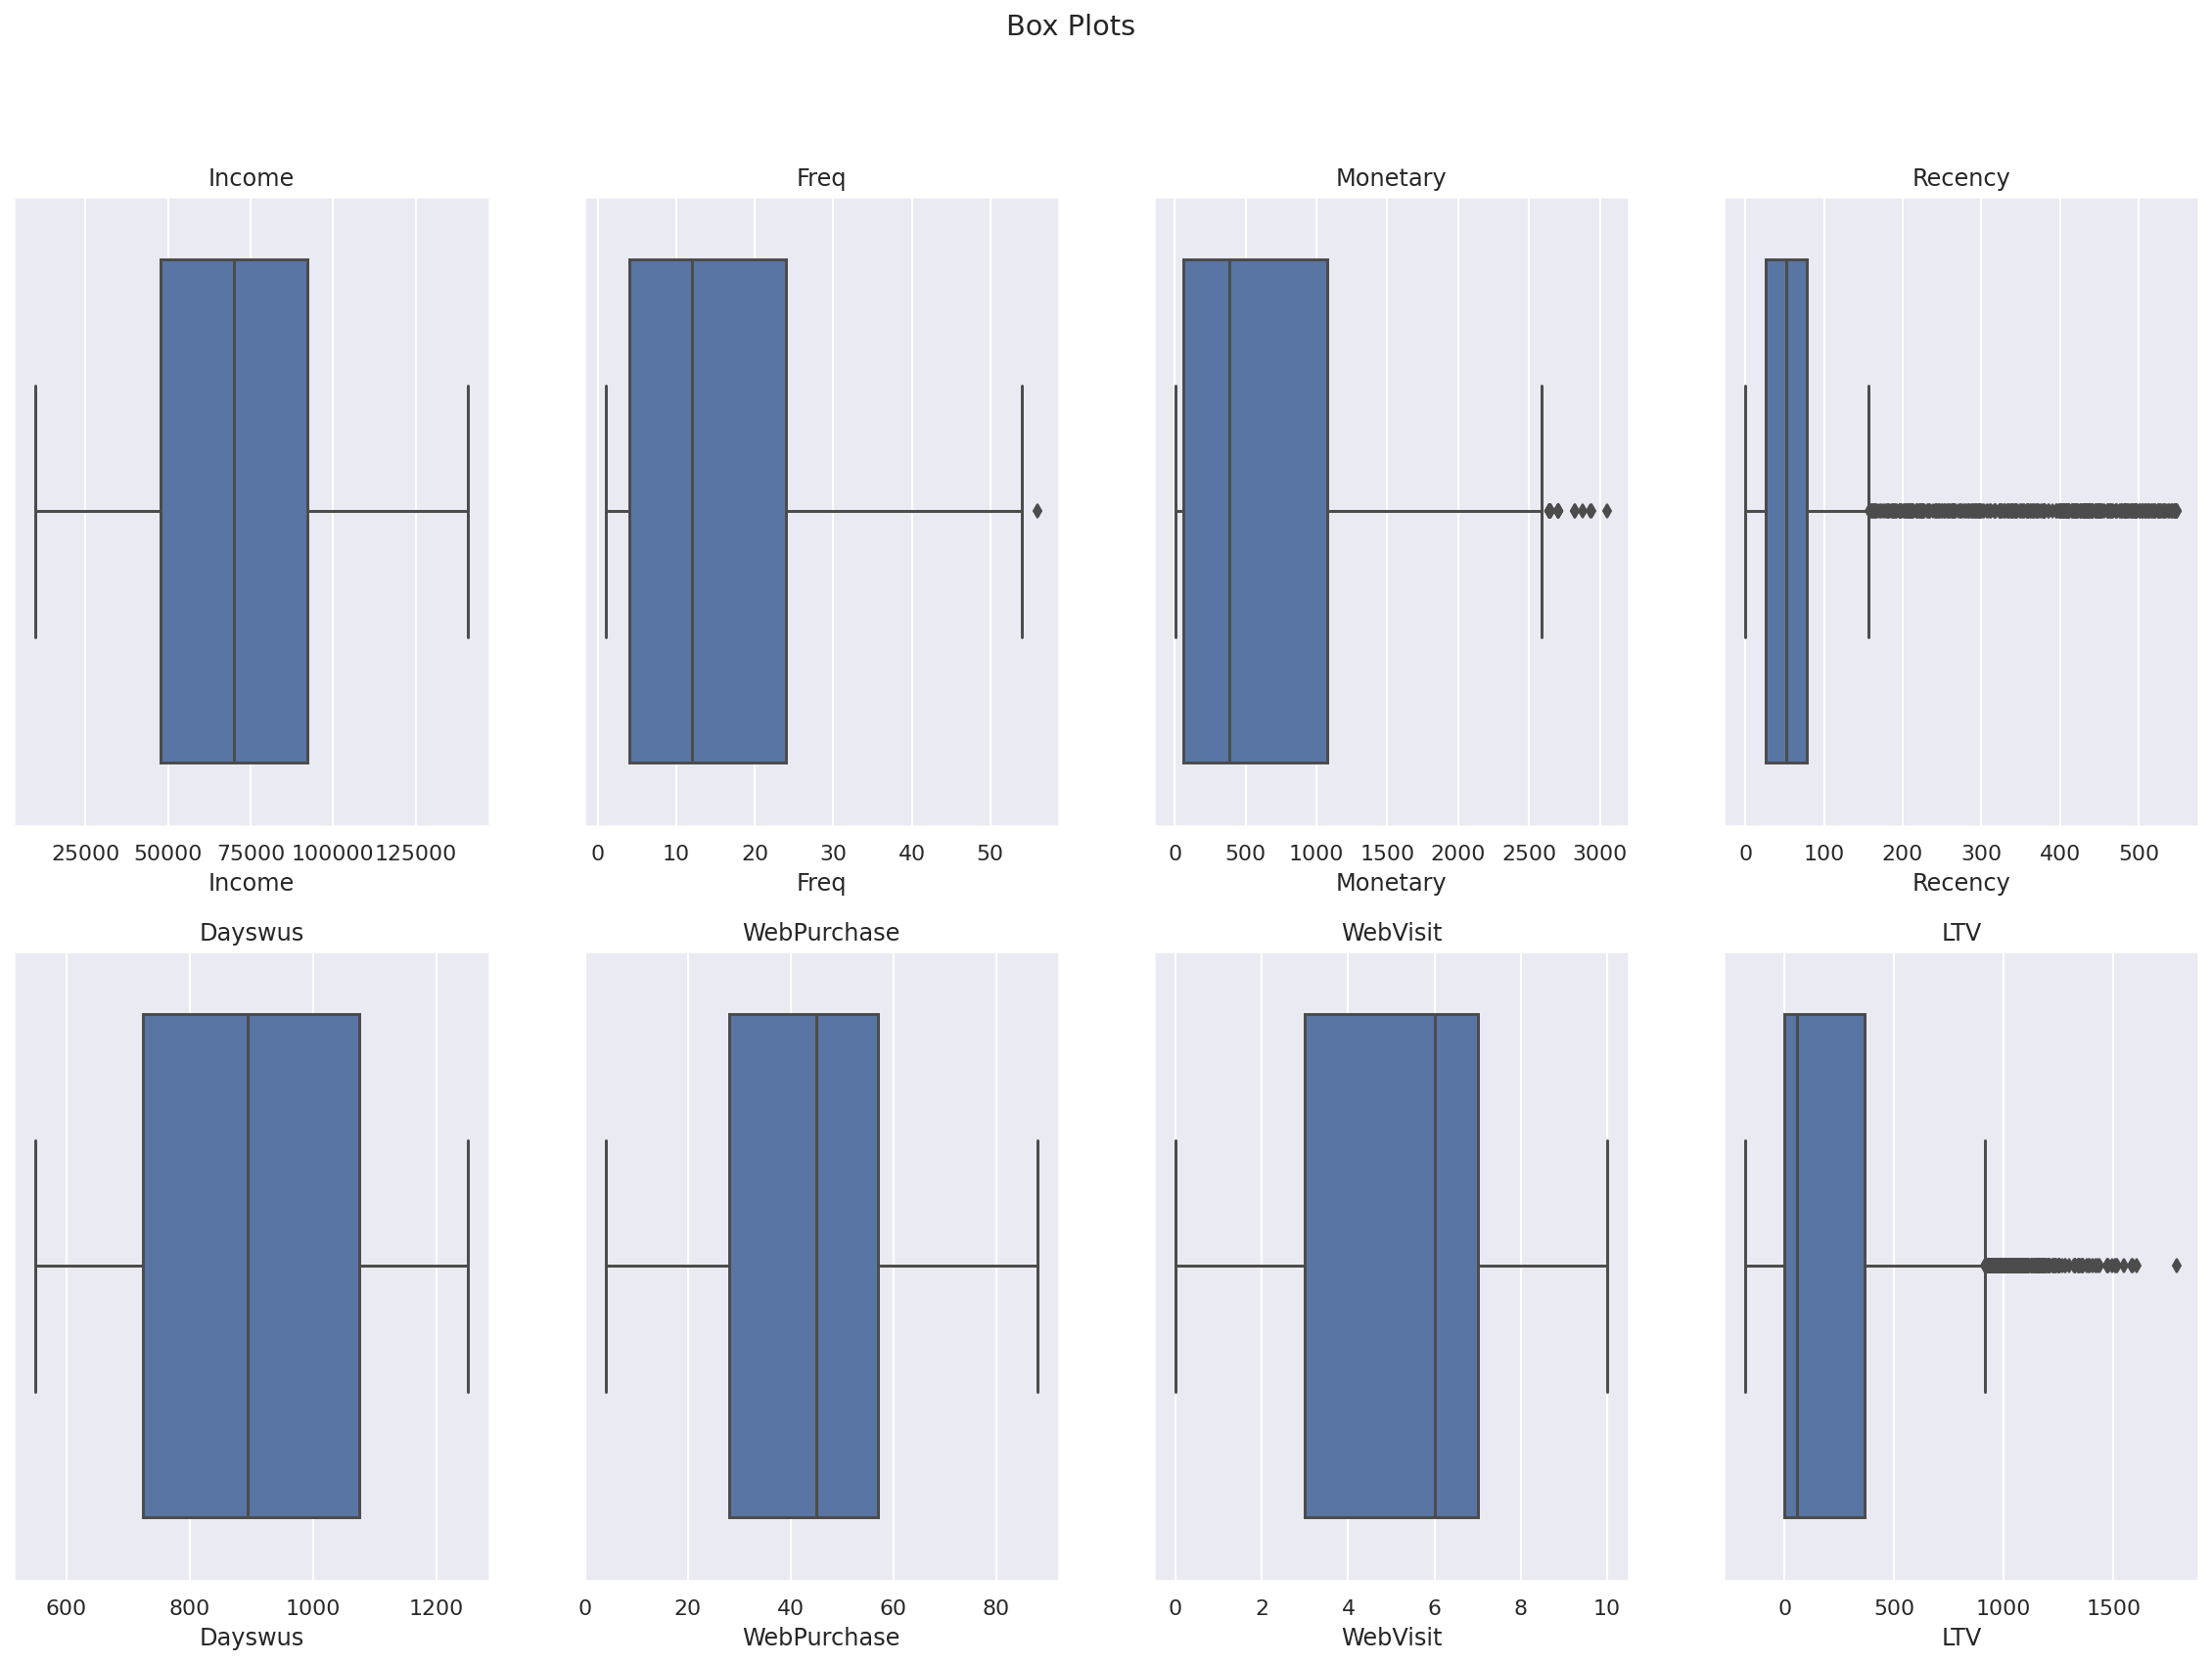

In [ ]:
# Engagement Box plots
sns.set()
plot_multiple_boxplots(df, engagement_features)

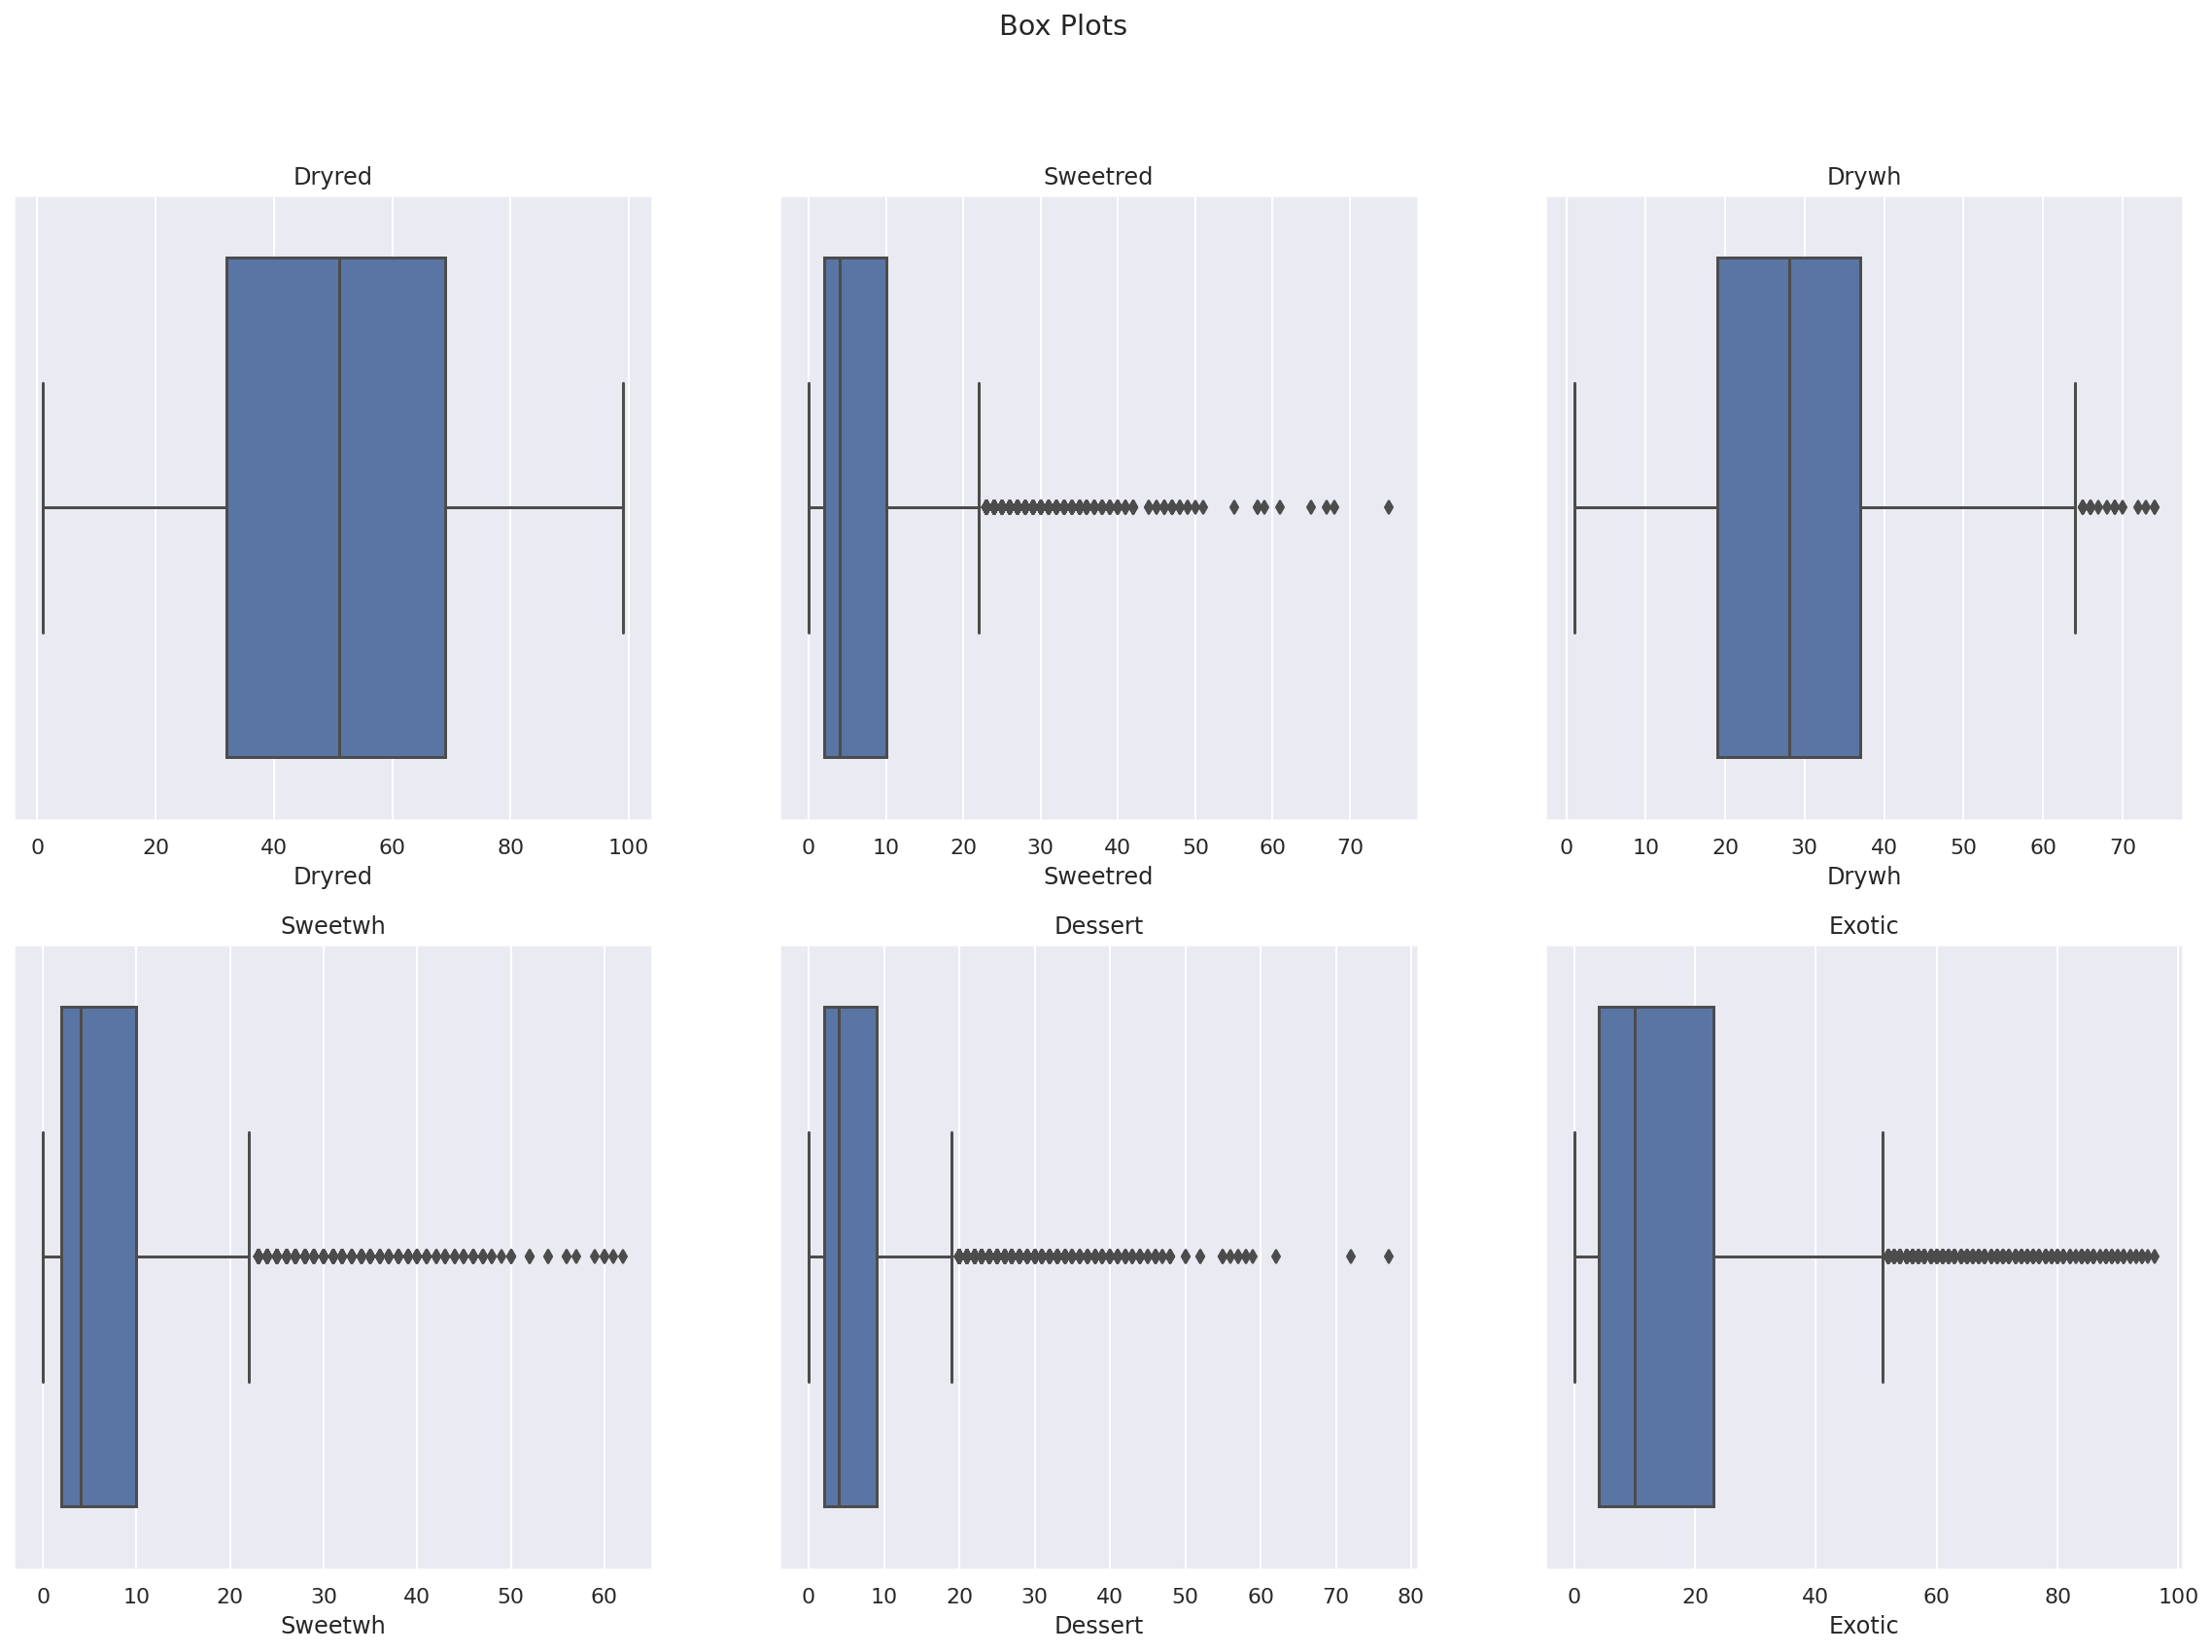

In [ ]:
# Behavior Box plots
sns.set()
plot_multiple_boxplots(df, behavior_features)

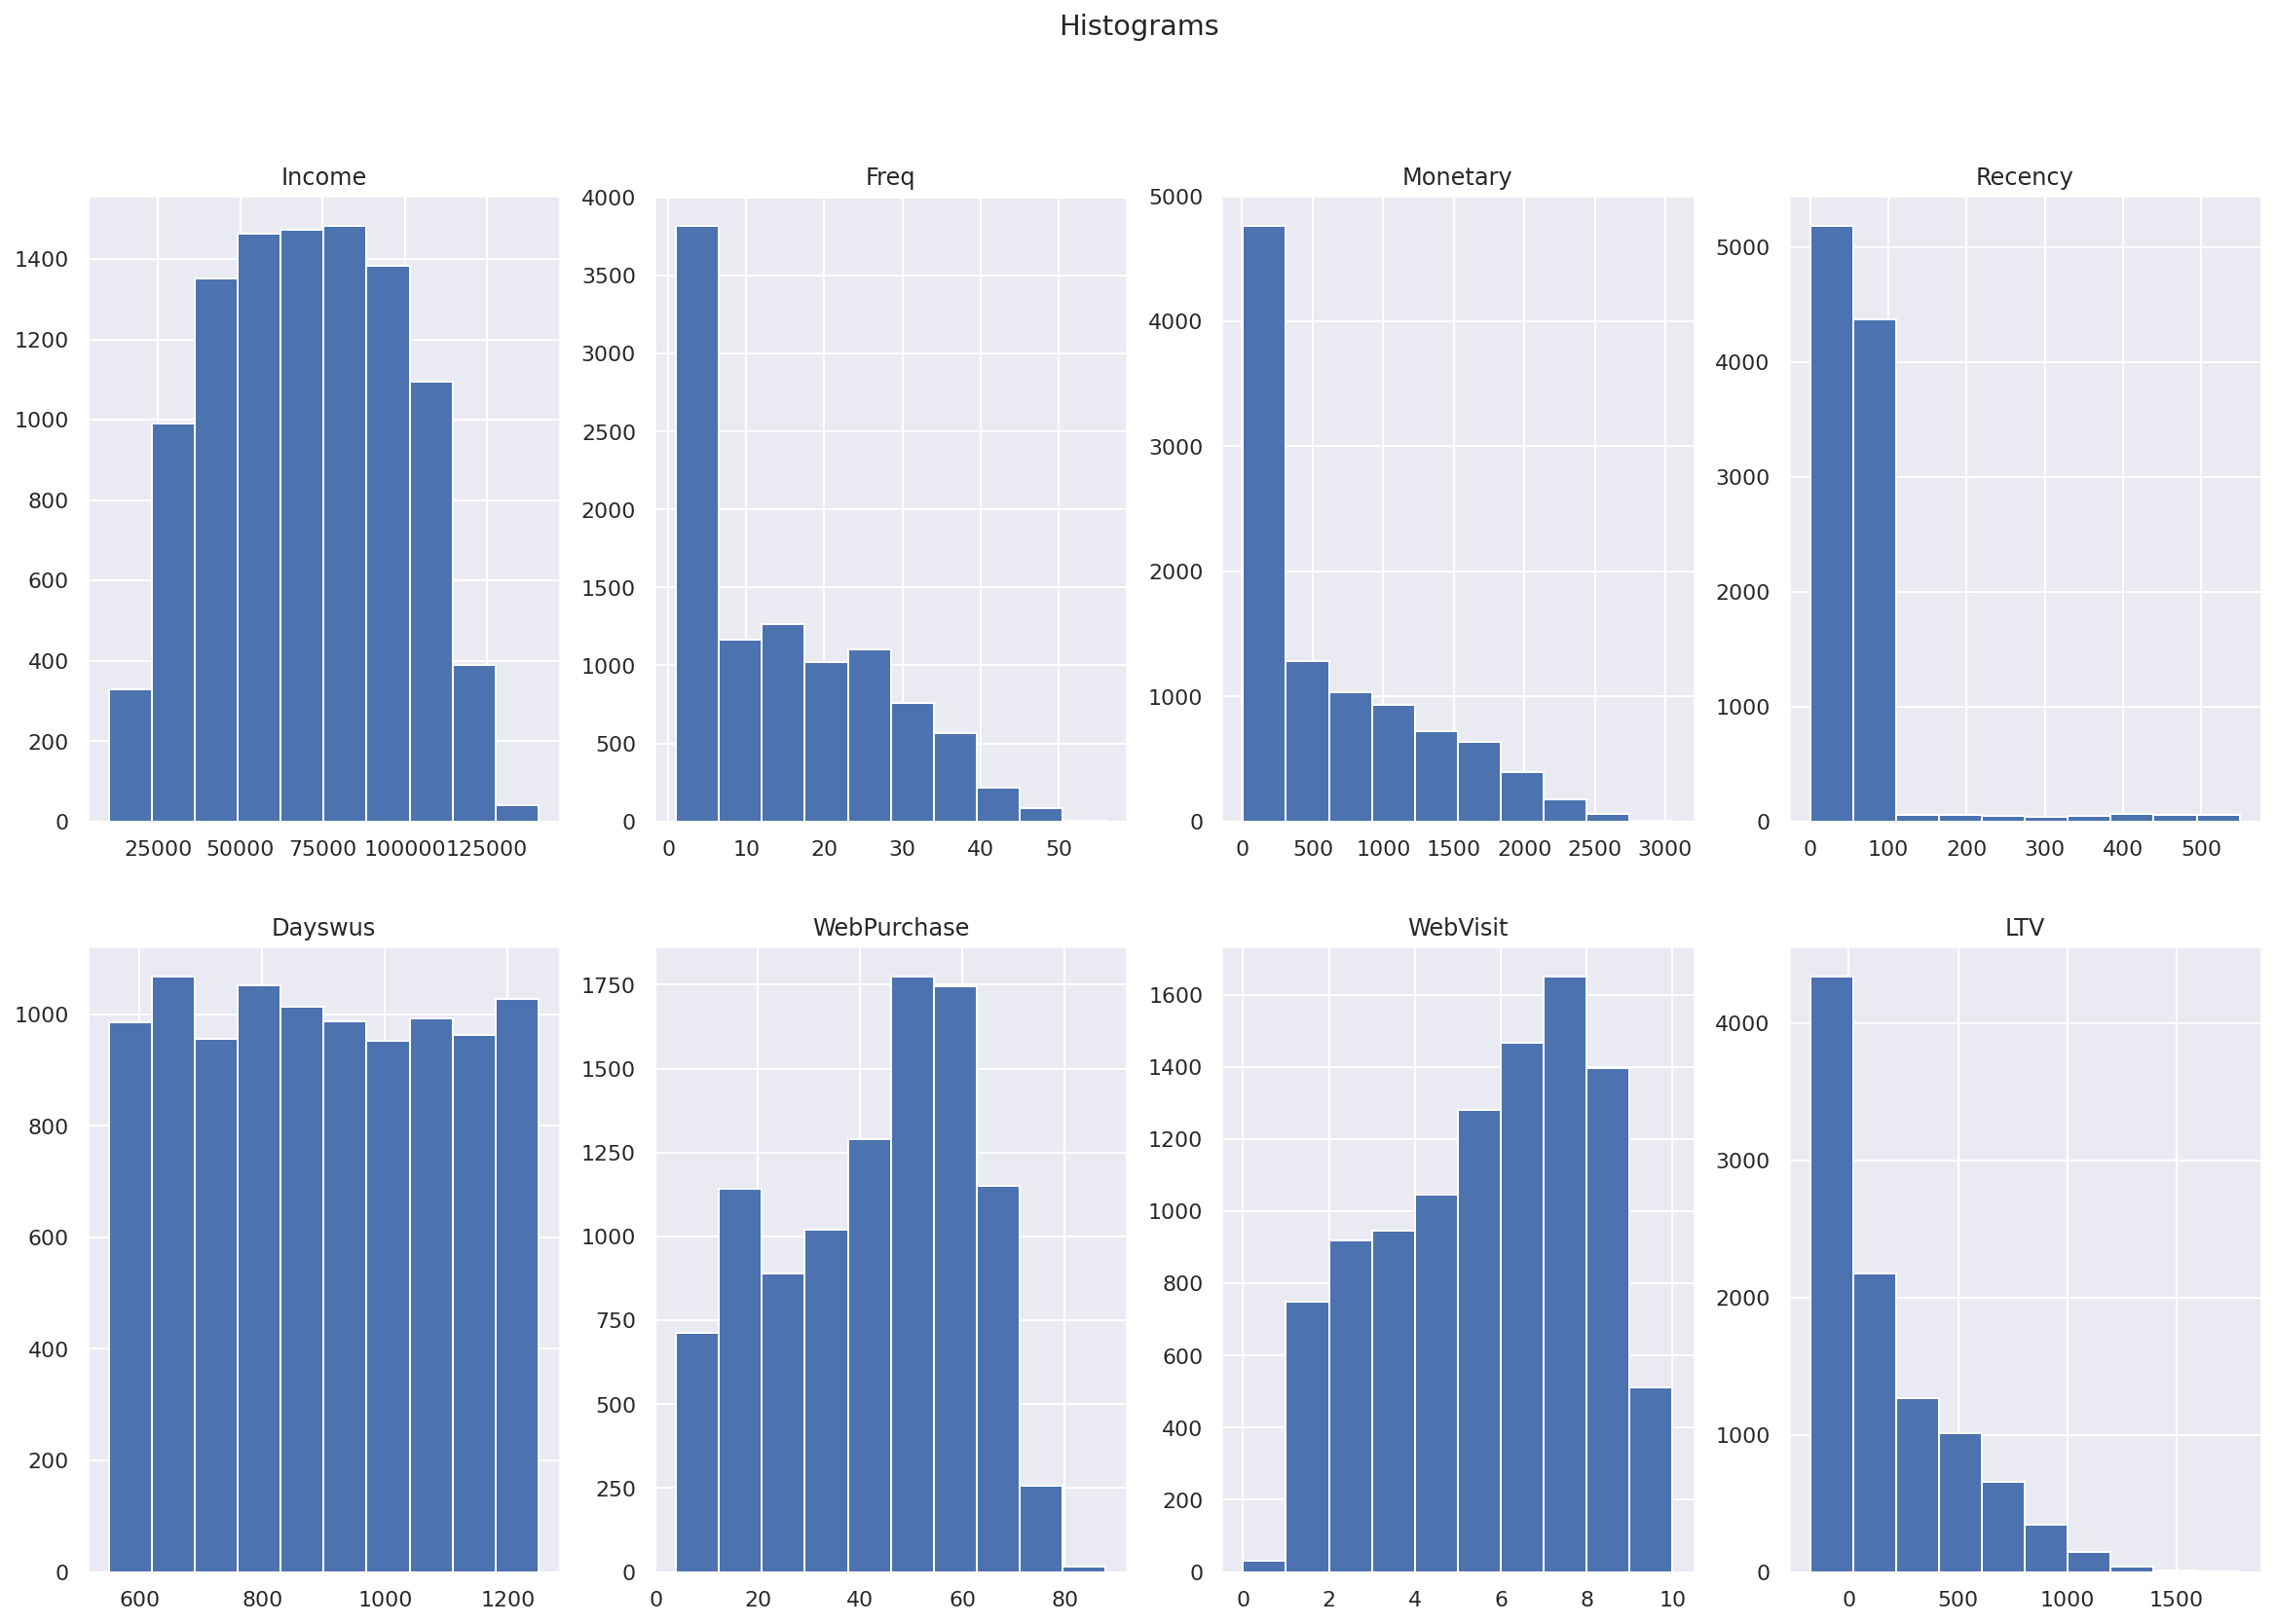

In [ ]:
# Engagement Histograms 
sns.set()
plot_multiple_histograms(df, engagement_features)

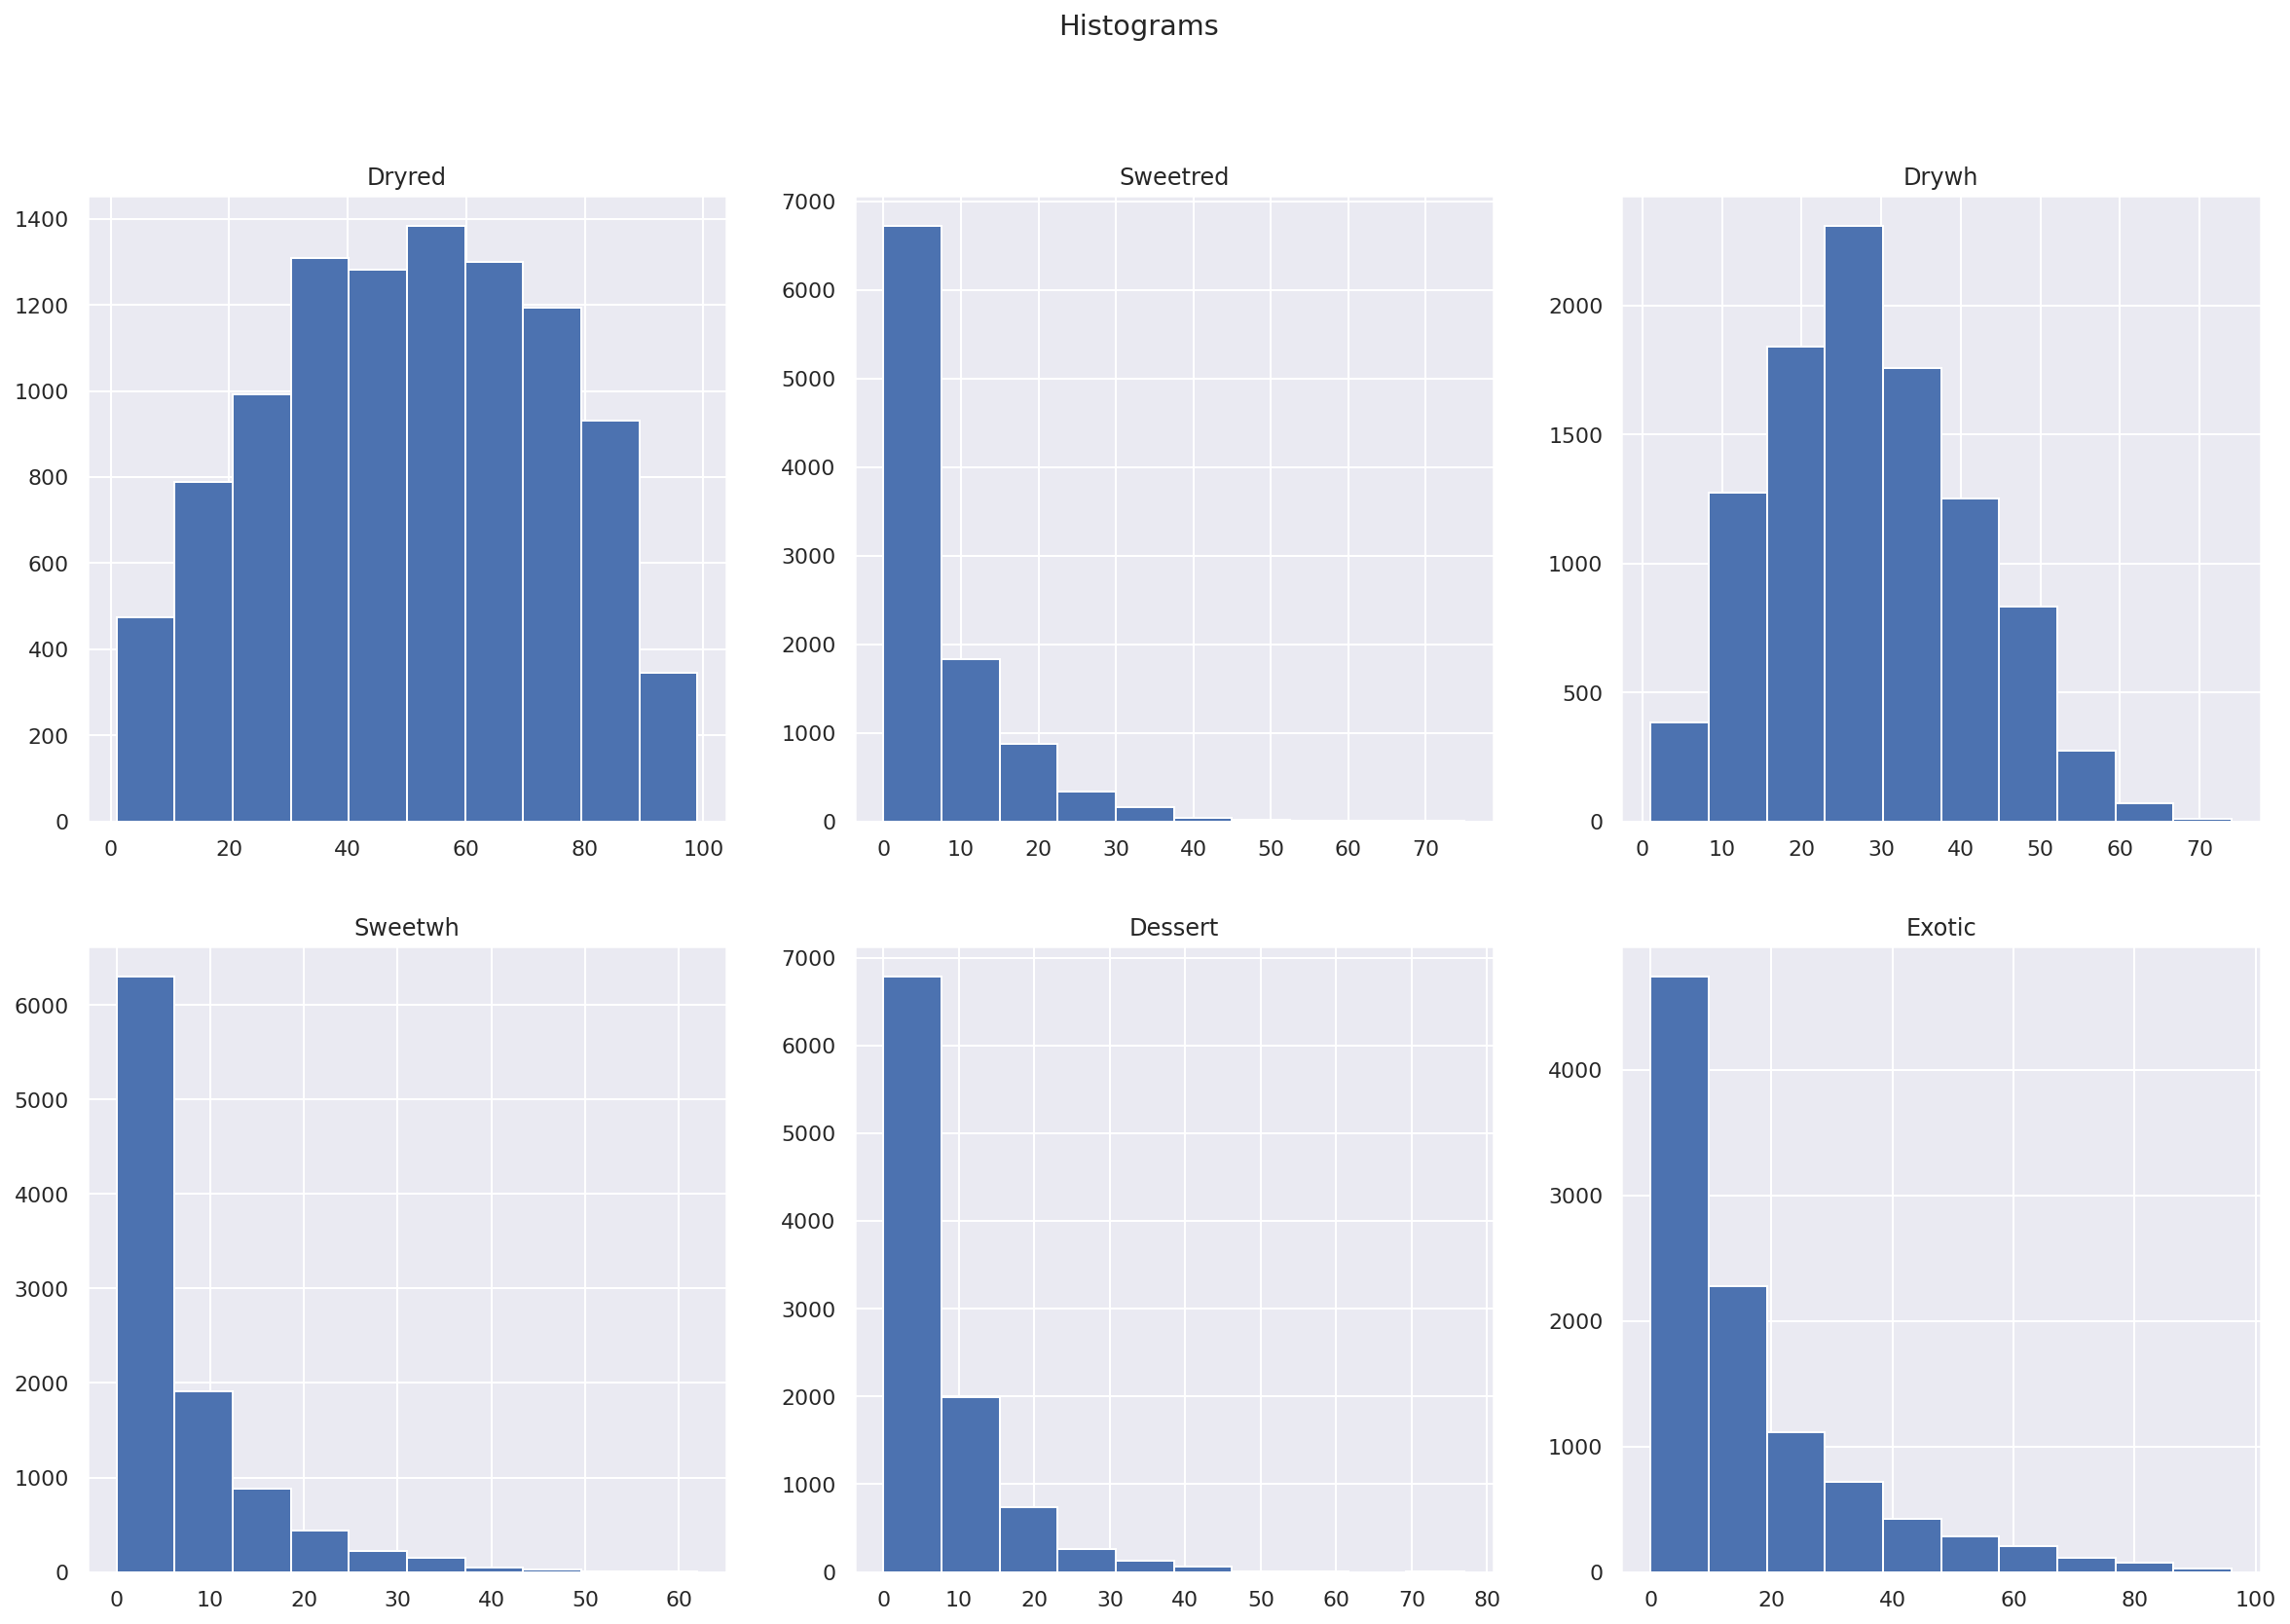

In [ ]:
# Behavior Histograms 
sns.set()
plot_multiple_histograms(df, behavior_features)

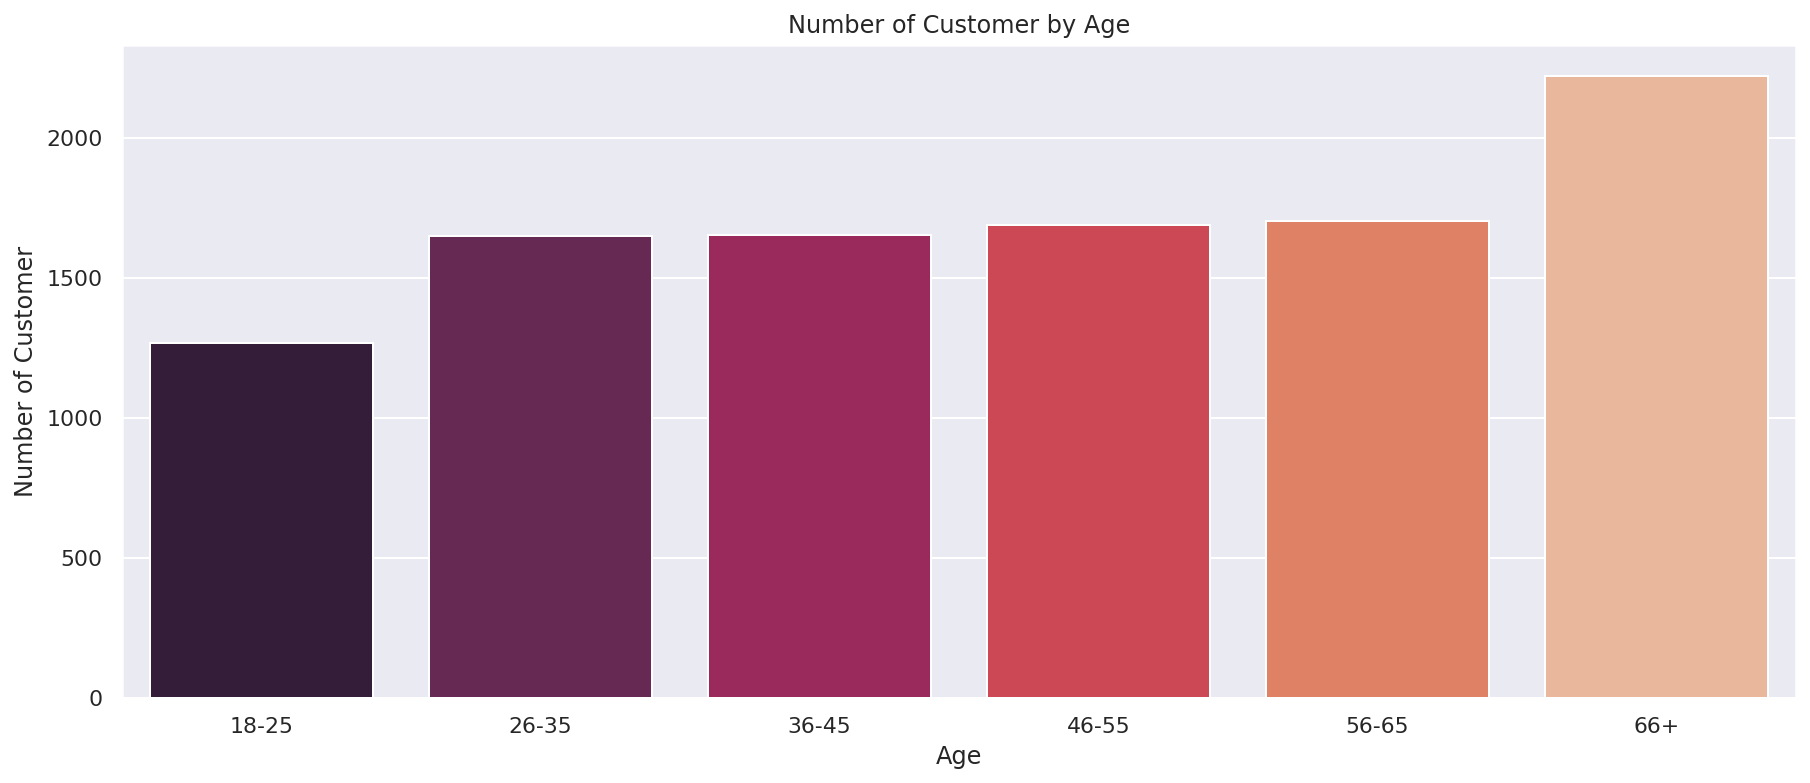

In [ ]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age56_65 = df.Age[(df.Age <= 65) & (df.Age >= 56)]
age65above = df.Age[df.Age >= 65]

x = ["18-25","26-35","36-45","46-55","56-65","66+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_65.values),len(age65above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer by Age")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

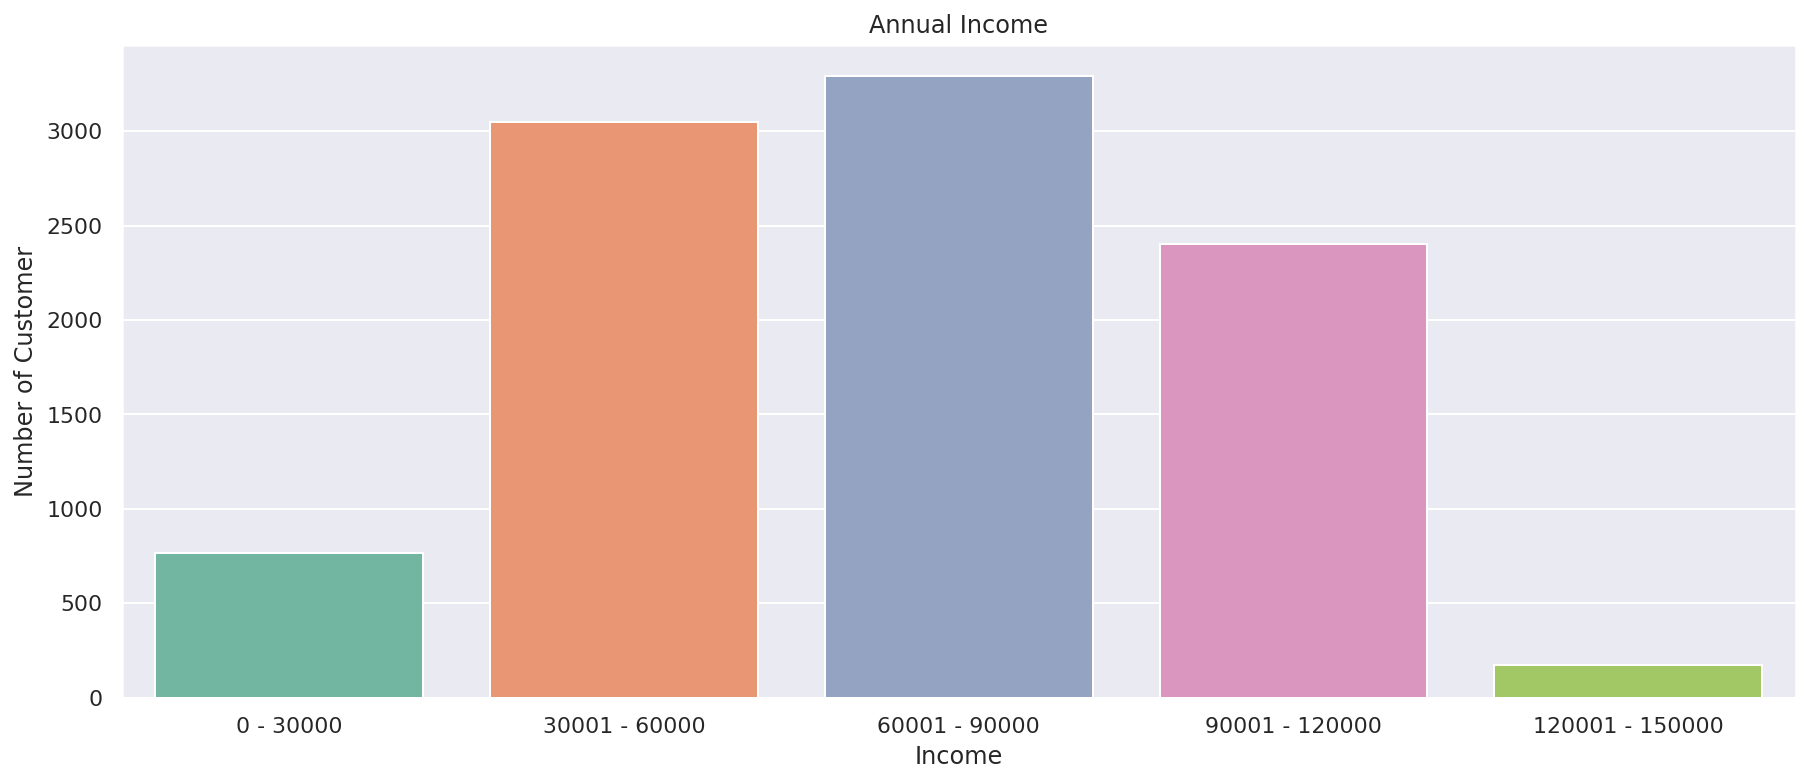

In [ ]:
ai0_30000 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 30000)]
ai31000_60000 = df["Income"][(df["Income"] >= 31000) & (df["Income"] <= 60000)]
ai61000_90000 = df["Income"][(df["Income"] >= 61000) & (df["Income"] <= 90000)]
ai91000_120000 = df["Income"][(df["Income"] >= 91000) & (df["Income"] <= 120000)]
ai121000_150000 = df["Income"][(df["Income"] >= 121000) & (df["Income"] <= 150000)]

aix = ["0 - 30000", "30001 - 60000", "60001 - 90000", "90001 - 120000", "120001 - 150000"]
aiy = [len(ai0_30000.values), len(ai31000_60000.values), len(ai61000_90000.values), len(ai91000_120000.values), len(ai121000_150000.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# **Data Visualization (2)**

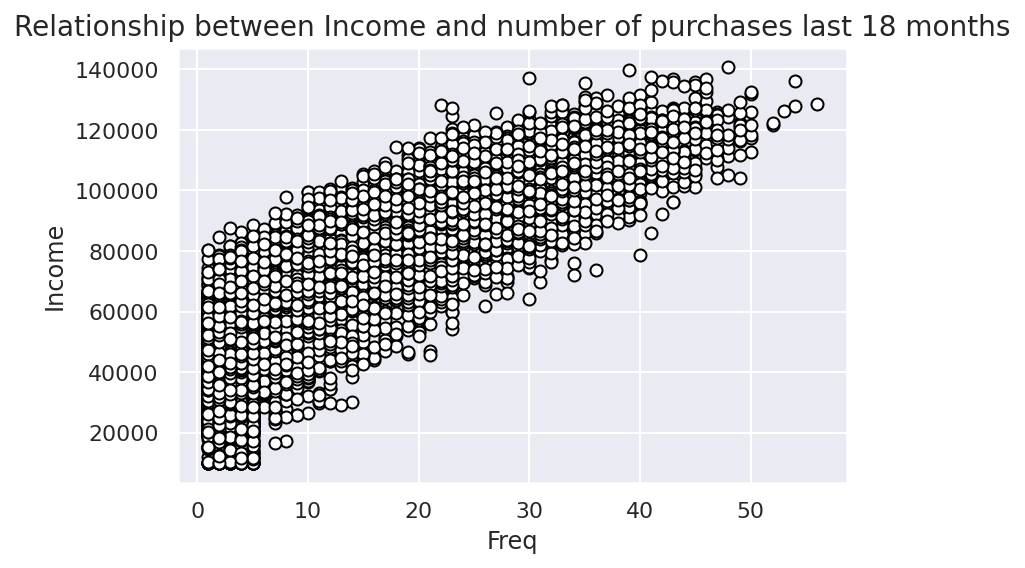

In [ ]:
#Pairwise relationship between variables
plt.scatter(df["Freq"], df["Income"], edgecolors ="black", color="white")
plt.xlabel("Freq")
plt.ylabel("Income")
plt.title("Relationship between Income and number of purchases last 18 months", fontsize=14)

plt.show()


# **1. Data Modeling: Hierarchical Clustering**

In [ ]:
#Performing Hierarchical Clustering: Engagement
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5)
hc_labels1 = hclust.fit_predict(df[engagement_features])
hc_labels1


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Performing Hierarchical Clustering: Behavior
hclust_behavior = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5)
hc_labels2= hclust.fit_predict(df[behavior_features])
hc_labels2


array([1, 1, 0, ..., 1, 3, 2])

In [ ]:
# Defining linkage methods and number of clusters: Engagement

# Computing SST

X = df[engagement_features].values

sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)



# Computing SSW

ssw_iter = []

for i in np.unique(hc_labels1):

    X_k = X[hc_labels1 == i]

    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))

ssw = np.sum(ssw_iter, axis=0)



# Computing SSB

ssb_iter = []

for i in np.unique(hc_labels1):

    X_k = X[hc_labels1 == i]

    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))

ssb = np.sum(ssb_iter, axis=0)



# Verifying the formula

np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Defining linkage methods and number of clusters: Behavior

# Computing SST

X = df[behavior_features].values

sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)



# Computing SSW

ssw_iter = []

for i in np.unique(hc_labels2):

    X_k = X[hc_labels2 == i]

    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))

ssw = np.sum(ssw_iter, axis=0)



# Computing SSB

ssb_iter = []

for i in np.unique(hc_labels2):

    X_k = X[hc_labels2 == i]

    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))

ssb = np.sum(ssb_iter, axis=0)



# Verifying the formula

np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True])

In [ ]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):

    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  
    
    sst = get_ss(df) 
    
    r2 = []  
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        hclabels = cluster.fit_predict(df) #get cluster labels
        
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [ ]:
## This function plots the R2 values for each linkage method for cluster sizes from 1 to 5

def plot_r2_linkage(df, max_nclus):
    hc_methods = ["ward", "complete", "average", "single"]
    
    max_nclus = 10
    r2_hc_methods = np.vstack(
        [
            get_r2_hc(df=df, link_method=link, max_nclus=max_nclus) 
            for link in hc_methods
        ]
    ).T
    r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

    sns.set()

    fig = plt.figure(figsize=(20,8))
    sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)
    fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
   
    plt.gca().invert_xaxis()  # invert x axis
    plt.legend(title="HC methods", title_fontsize=11)
    plt.xticks(range(1, max_nclus + 1))
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R2 metric", fontsize=13)
    

    plt.show()

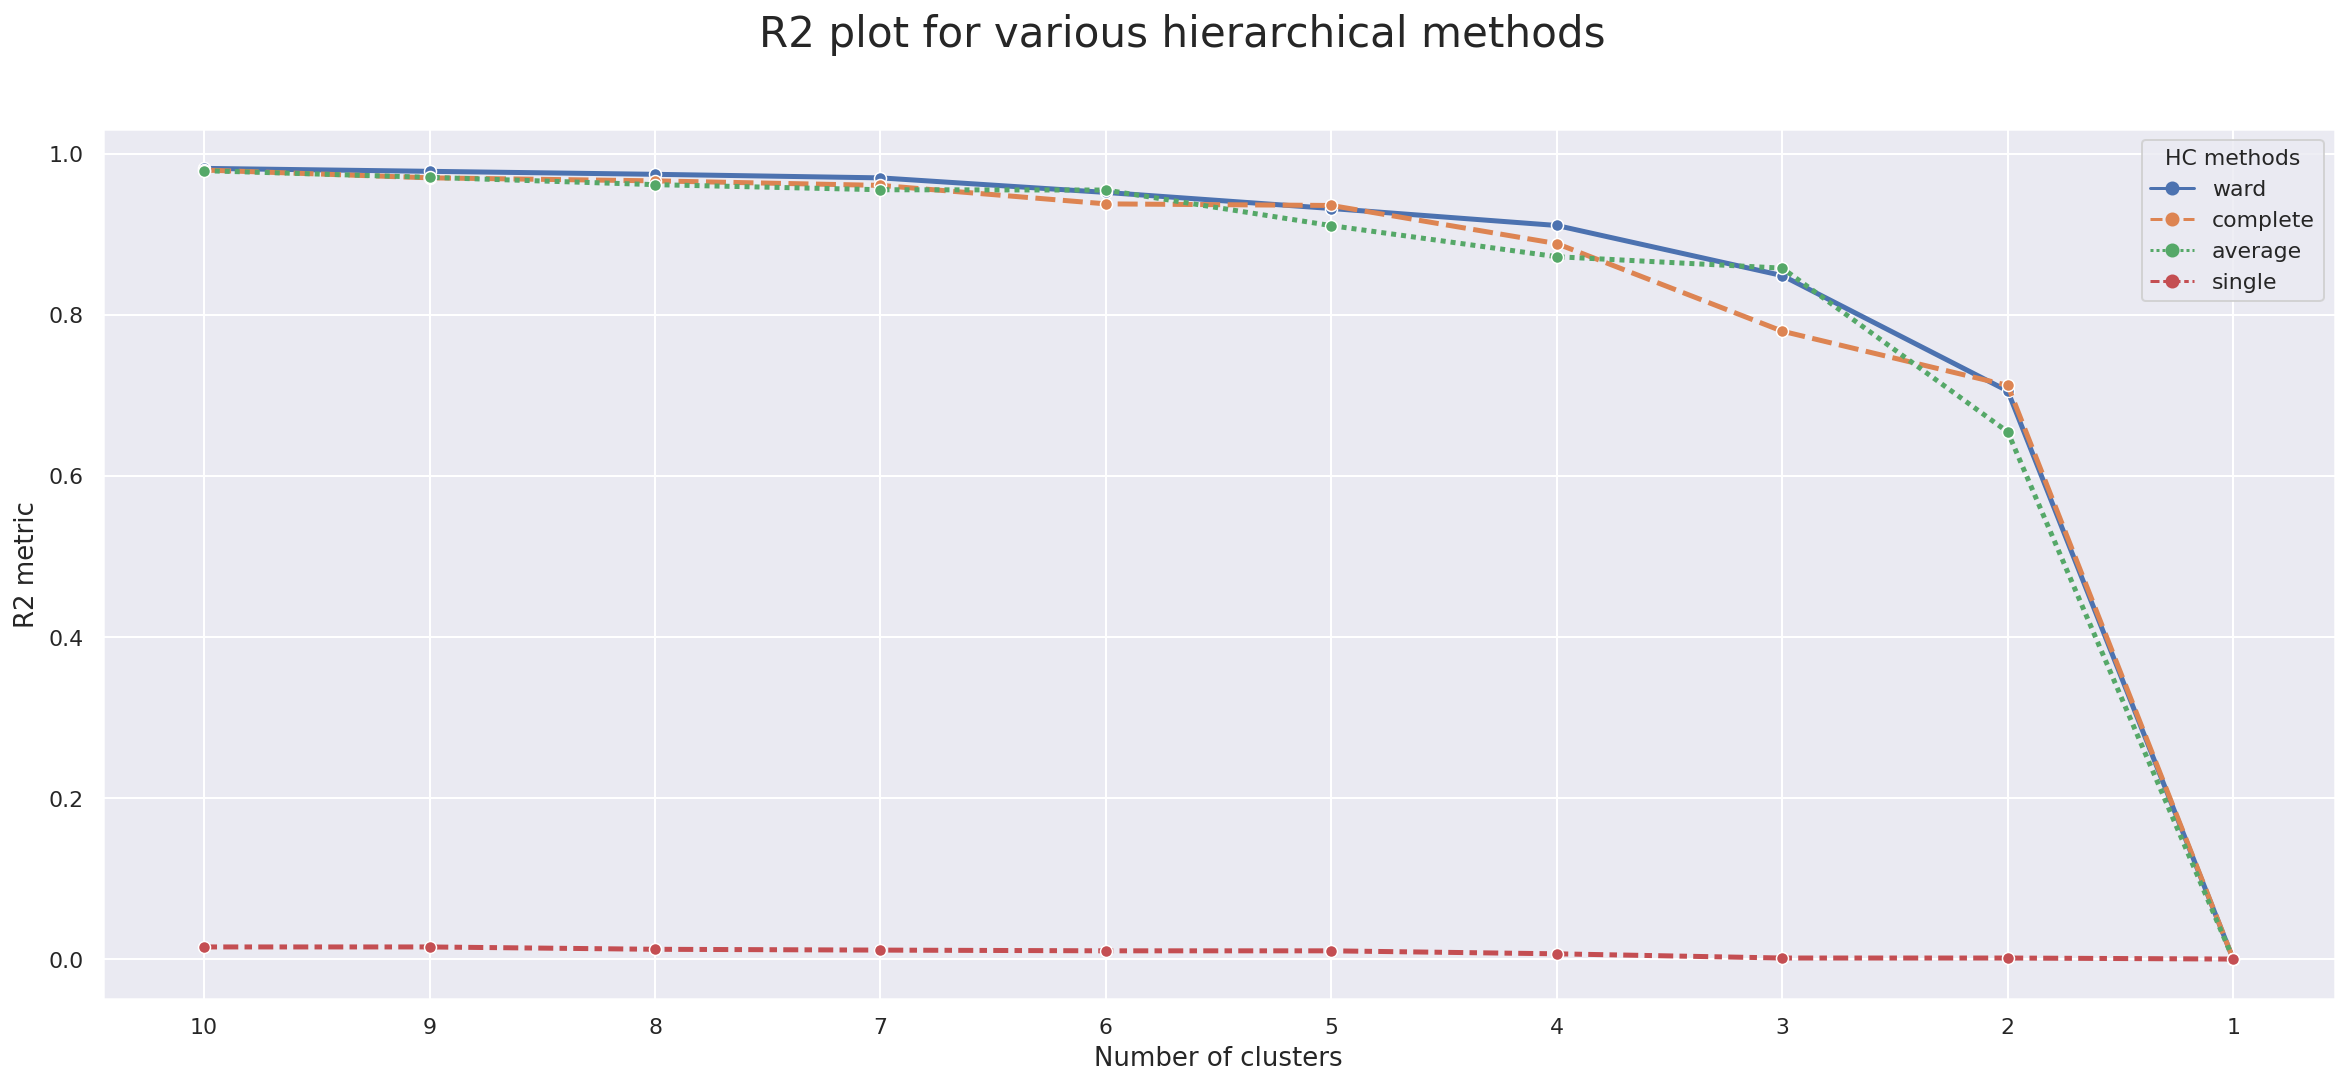

(None,)

In [ ]:
# Engagement
max_nclus = 10
plot_r2_linkage(df[engagement_features], max_nclus),



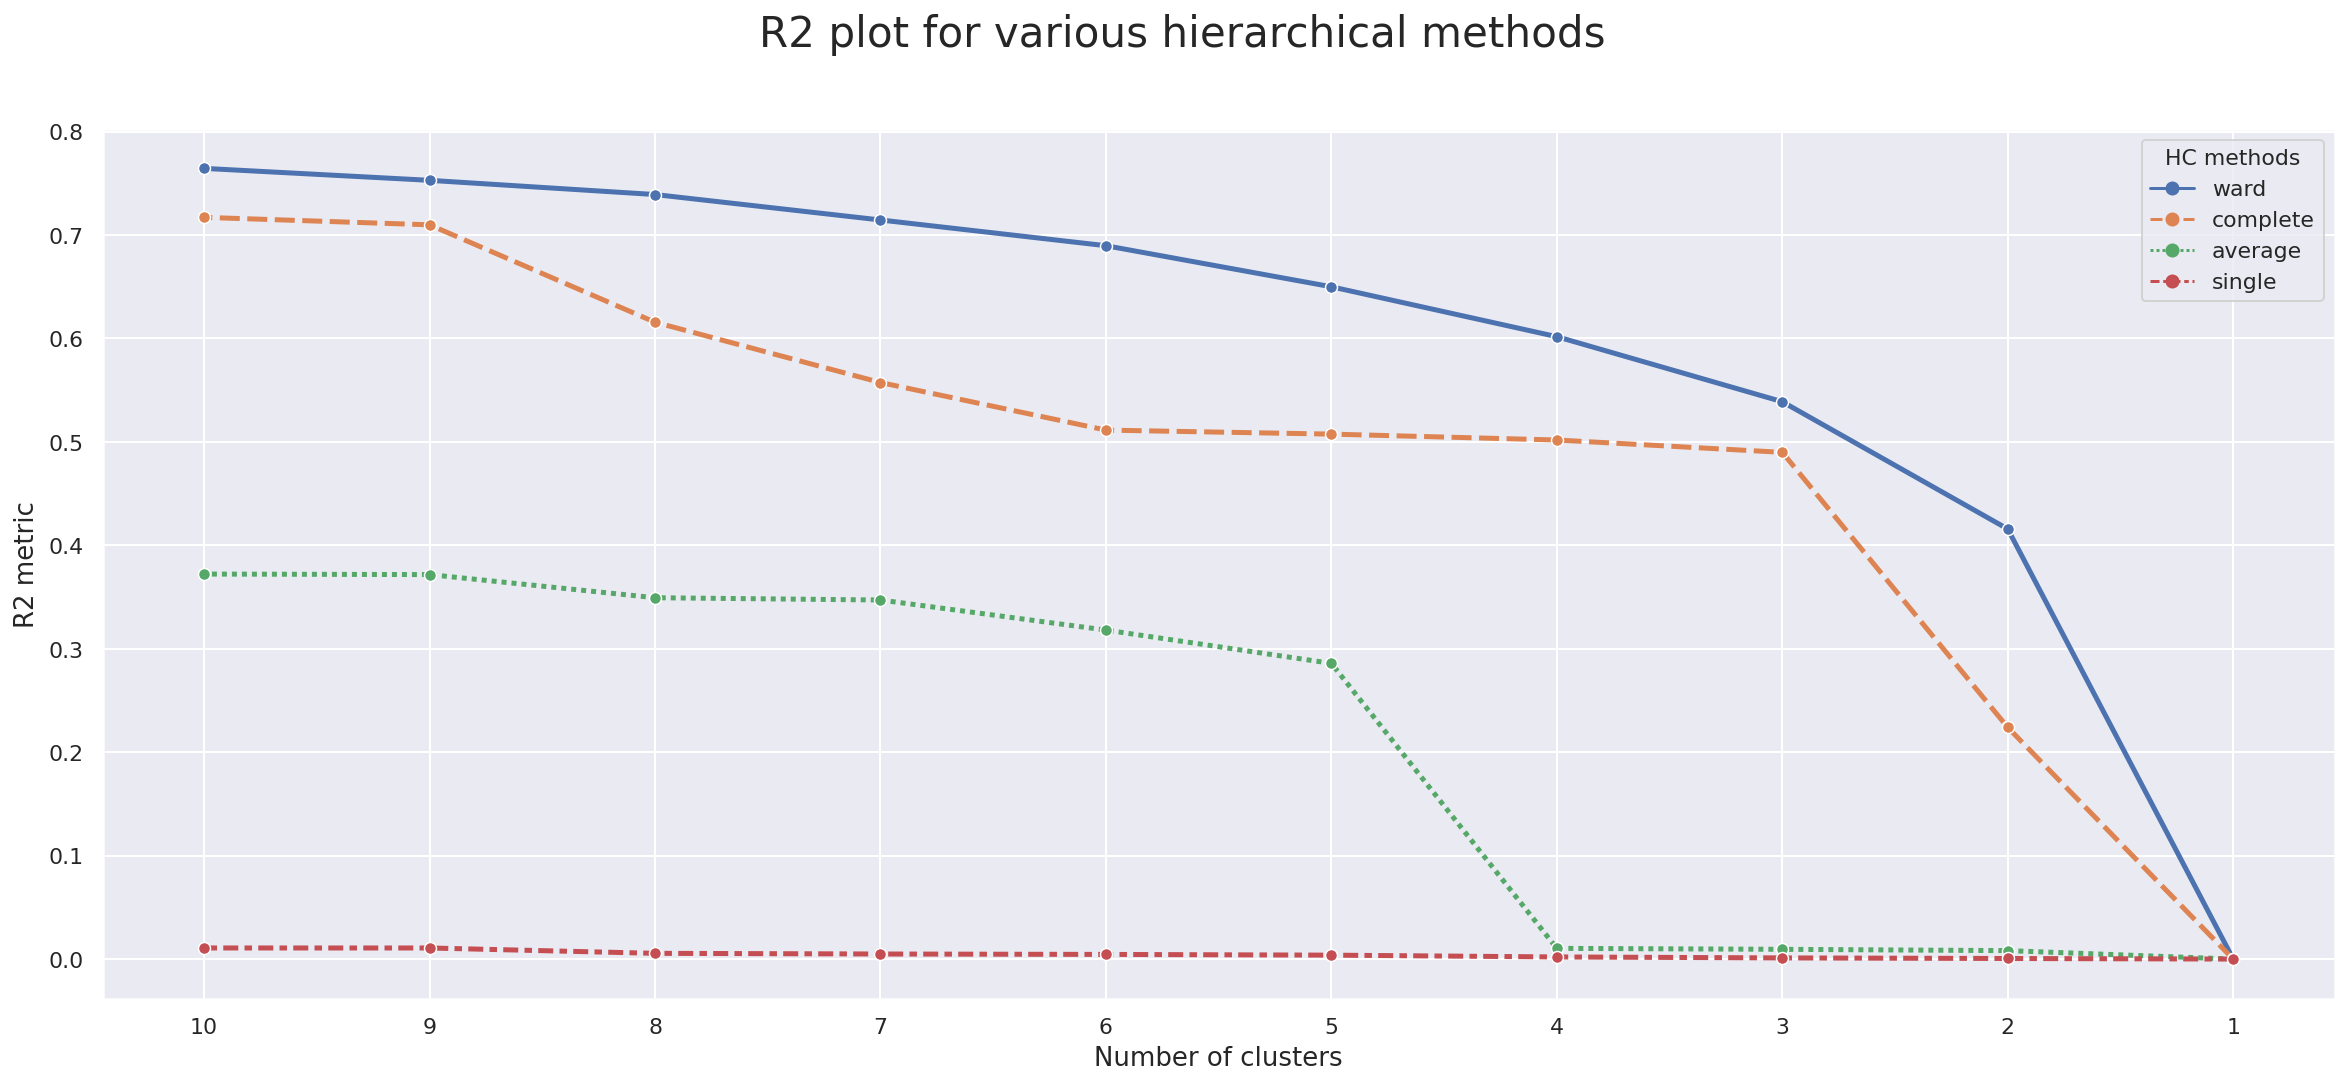

In [ ]:
# Behavior
max_nclus = 10
plot_r2_linkage(df[behavior_features], max_nclus)

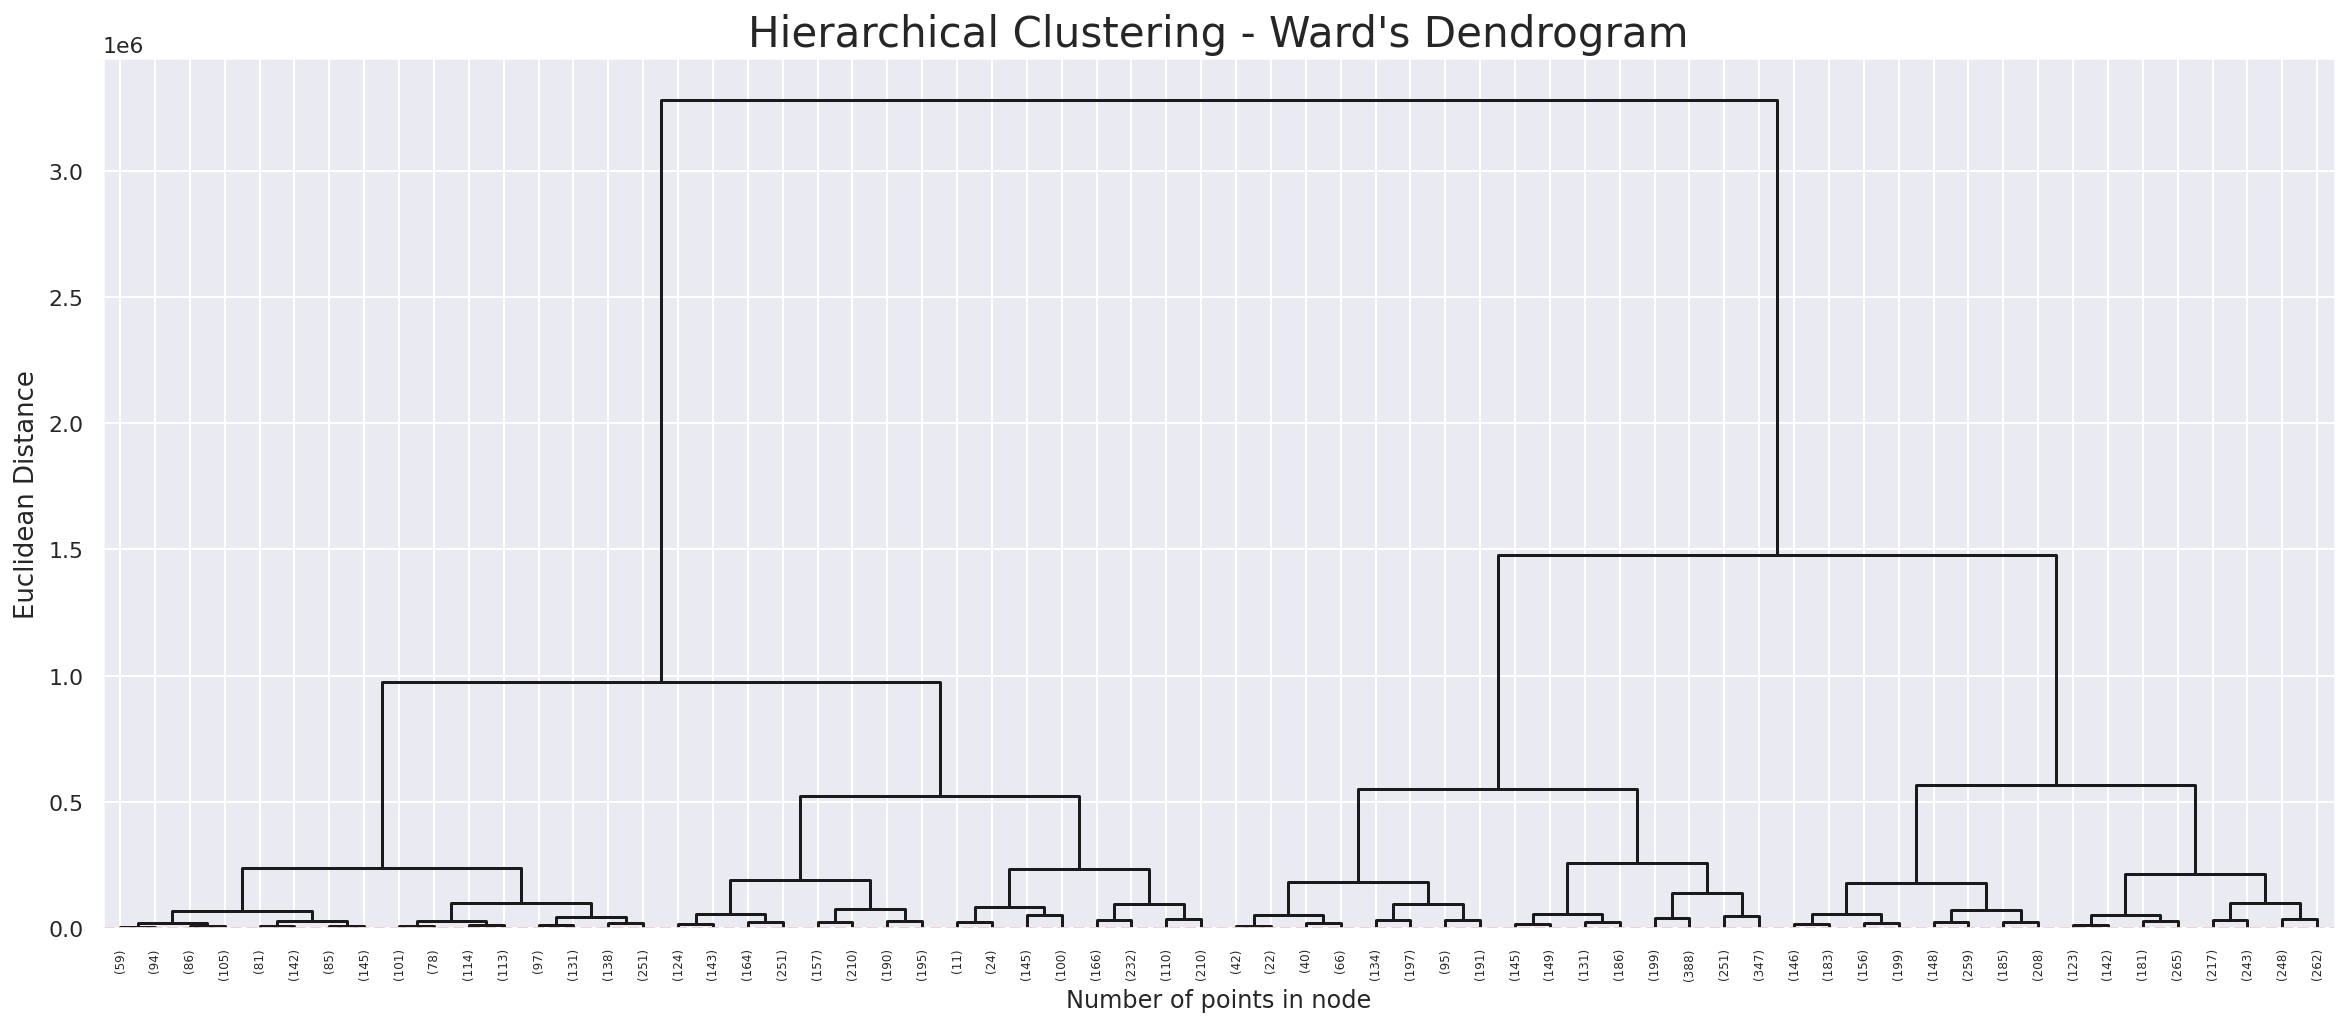

In [ ]:
# Engagement Dendrogram with Ward
linkage = 'ward'
distance = 'euclidean'


hclust_engagement = AgglomerativeClustering(linkage=linkage, 

                                 affinity=distance, 

                                 distance_threshold=0, 

                                 n_clusters=None)

hclust_engagement.fit_predict(df[engagement_features])

counts = np.zeros(hclust_engagement.children_.shape[0])

n_samples = len(hc_labels1)
 

for i, merge in enumerate(hclust_engagement.children_):

    current_count = 0

    for child_idx in merge:

        if child_idx < n_samples:

            current_count += 1  

        else:

            current_count += counts[child_idx - n_samples]

    counts[i] = current_count

 
# the counts indicate the number of points being merged (dendrogram's x-axis)

linkage_matrix = np.column_stack(

    [hclust_engagement.children_, hclust_engagement.distances_, counts]

).astype(float)

 

# Plot the corresponding dendrogram

sns.set()

fig = plt.figure(figsize=(20,8))
 

# The Dendrogram parameters need to be tuned

y_threshold = 1.5


# "dendrogram" function will plot our dendrogram

dendrogram(linkage_matrix, 

           truncate_mode='level', 

           p=5, 

           color_threshold=y_threshold, 

           above_threshold_color='k')
 

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)

plt.xlabel('Number of points in node')

plt.ylabel(f'{distance.title()} Distance', fontsize=13)

plt.show()

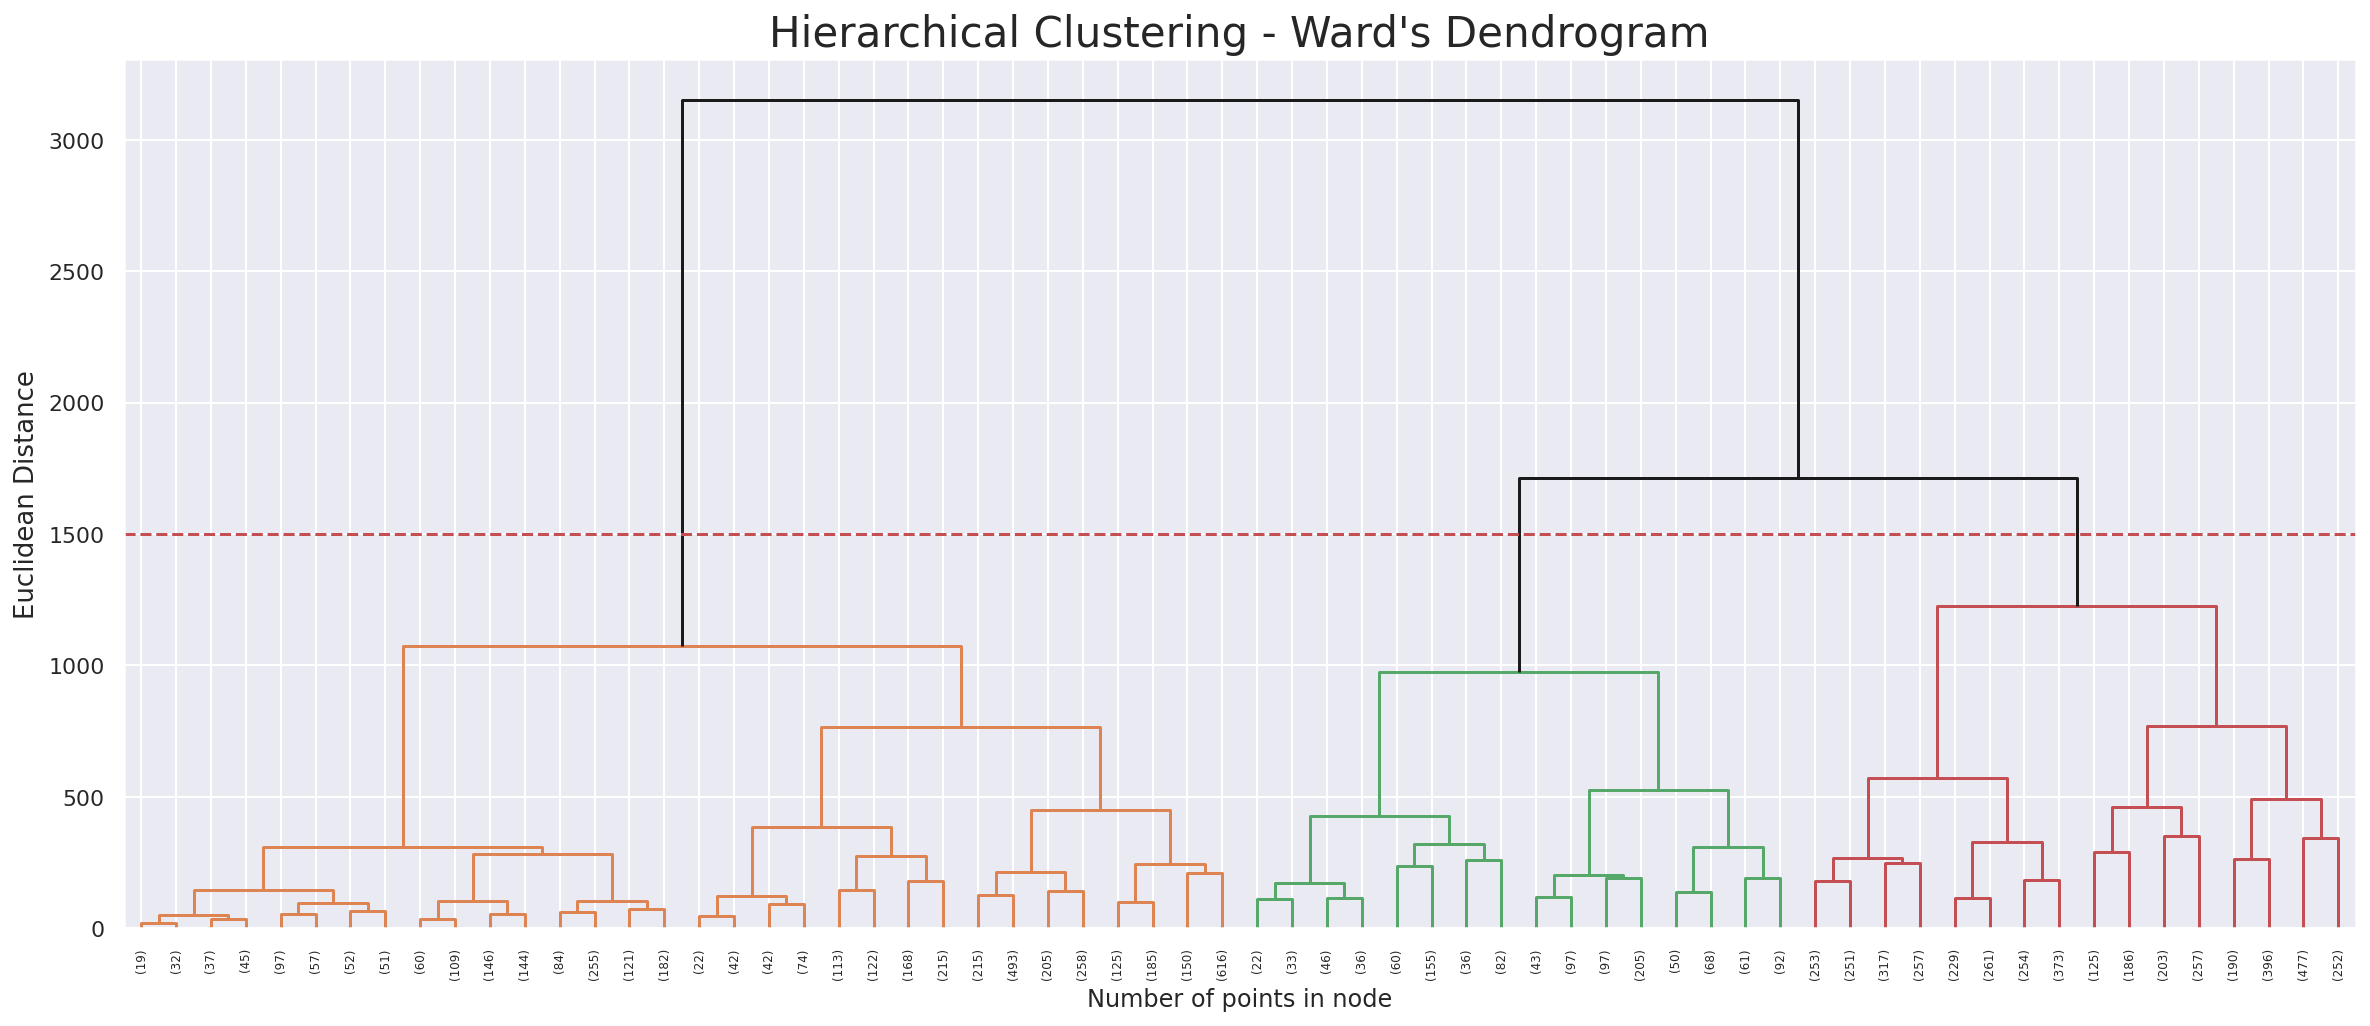

In [ ]:
# Behavior Dendrogram with Ward
linkage = 'ward'
distance = 'euclidean'


hclust_behavior = AgglomerativeClustering(linkage=linkage, 

                                 affinity=distance, 

                                 distance_threshold=0, 

                                 n_clusters=None)

hclust_behavior.fit_predict(df[behavior_features])

counts = np.zeros(hclust_behavior.children_.shape[0])

n_samples = len(hc_labels2)
 

for i, merge in enumerate(hclust_behavior.children_):

    current_count = 0

    for child_idx in merge:

        if child_idx < n_samples:

            current_count += 1  

        else:

            current_count += counts[child_idx - n_samples]

    counts[i] = current_count

 
# the counts indicate the number of points being merged (dendrogram's x-axis)

linkage_matrix = np.column_stack(

    [hclust_behavior.children_, hclust_behavior.distances_, counts]

).astype(float)

 

# Plot the corresponding dendrogram

sns.set()

fig = plt.figure(figsize=(20,8))
 

# The Dendrogram parameters need to be tuned

y_threshold = 1500


# "dendrogram" function will plot our dendrogram

dendrogram(linkage_matrix, 

           truncate_mode='level', 

           p=5, 

           color_threshold=y_threshold, 

           above_threshold_color='k')
 

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)

plt.xlabel('Number of points in node')

plt.ylabel(f'{distance.title()} Distance', fontsize=13)

plt.show()

In [ ]:
#Final Hierarchical Clustering Solution

# Engagement
linkage='ward'
distance='euclidean'
h3clust_engagement = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=5)
h3clust_engagement.fit_predict(df[engagement_features])

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Behavior
linkage='ward'
distance='euclidean'
h3clust_behavior = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=5)
h3clust_behavior.fit_predict(df[behavior_features])

array([1, 1, 0, ..., 1, 3, 2])

## **Merging using Hierarchical Clustering**

In [ ]:
#Caracterizing Clusters Behavior
df_concat = pd.concat((df_beh, pd.Series(hc_labels2, name='labels2')), axis=1)
df_concat.groupby('labels2').mean()

,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic
labels2,,,,,,
0,29.942519,12.517329,31.823331,12.965342,12.717667,51.415892
1,22.171620,13.854746,37.203739,13.576702,13.183605,16.385906
2,65.192447,3.429557,24.409524,3.636125,3.323481,13.250246
3,44.430524,6.709795,35.385877,6.559909,6.913440,8.410023
4,84.586854,1.116700,12.045607,1.051643,1.095238,7.815560


In [ ]:
#Caracterizing Clusters Engagement
df_concat = pd.concat((df_eng, pd.Series(hc_labels1, name='labels1')), axis=1)
df_concat.groupby('labels1').mean()

,Income,Freq,Monetary,Recency,Dayswus,WebPurchase,WebVisit,LTV
labels1,,,,,,,,
0,34698.022842,3.595819,68.609756,82.210995,901.163376,57.225319,6.845916,-1.210608
1,105998.091694,30.456003,1499.151316,50.463405,889.009868,21.565789,2.831414,602.078947
2,55721.218322,6.155265,175.162998,68.864961,899.179655,53.179655,6.380131,12.305770
3,84661.295604,19.306044,816.287363,49.974725,899.966484,35.595055,4.562637,262.414286
4,70000.203504,11.752022,419.342992,55.440701,904.166442,46.713612,5.773585,88.479111


# **2. Data Modeling: K-means Clustering**

In [ ]:
kmeans_engagement = KMeans(n_clusters=8, init='random', n_init=10, random_state=1)
kmeans_engagement.fit(df[engagement_features])
kmeans_engagement.predict(df[engagement_features])

kmeans_behavior = KMeans(n_clusters=8, init='random', n_init=10, random_state=1)
kmeans_behavior.fit(df[behavior_features])
kmeans_behavior.predict(df[behavior_features])

array([5, 5, 6, ..., 5, 0, 7], dtype=int32)

In [ ]:
# Defining number of clusters
range_clusters = range(1, 10)

In [ ]:
# Cluster initialization

# Engagement
inertia = []
for n_clus in range_clusters:  
    kmeans_engagement = KMeans(n_clusters=n_clus, init='k-means++', n_init=10, random_state=1)
    y_engagement = kmeans_engagement.fit(df[engagement_features])
    inertia.append(kmeans_engagement.inertia_)  

# Behavior
    inertia = []
for n_clus in range_clusters:  
    kmeans_behavior = KMeans(n_clusters=n_clus, init='k-means++', n_init=10, random_state=1)
    y_behavior = kmeans_behavior.fit(df[behavior_features])
    inertia.append(kmeans_behavior.inertia_)  

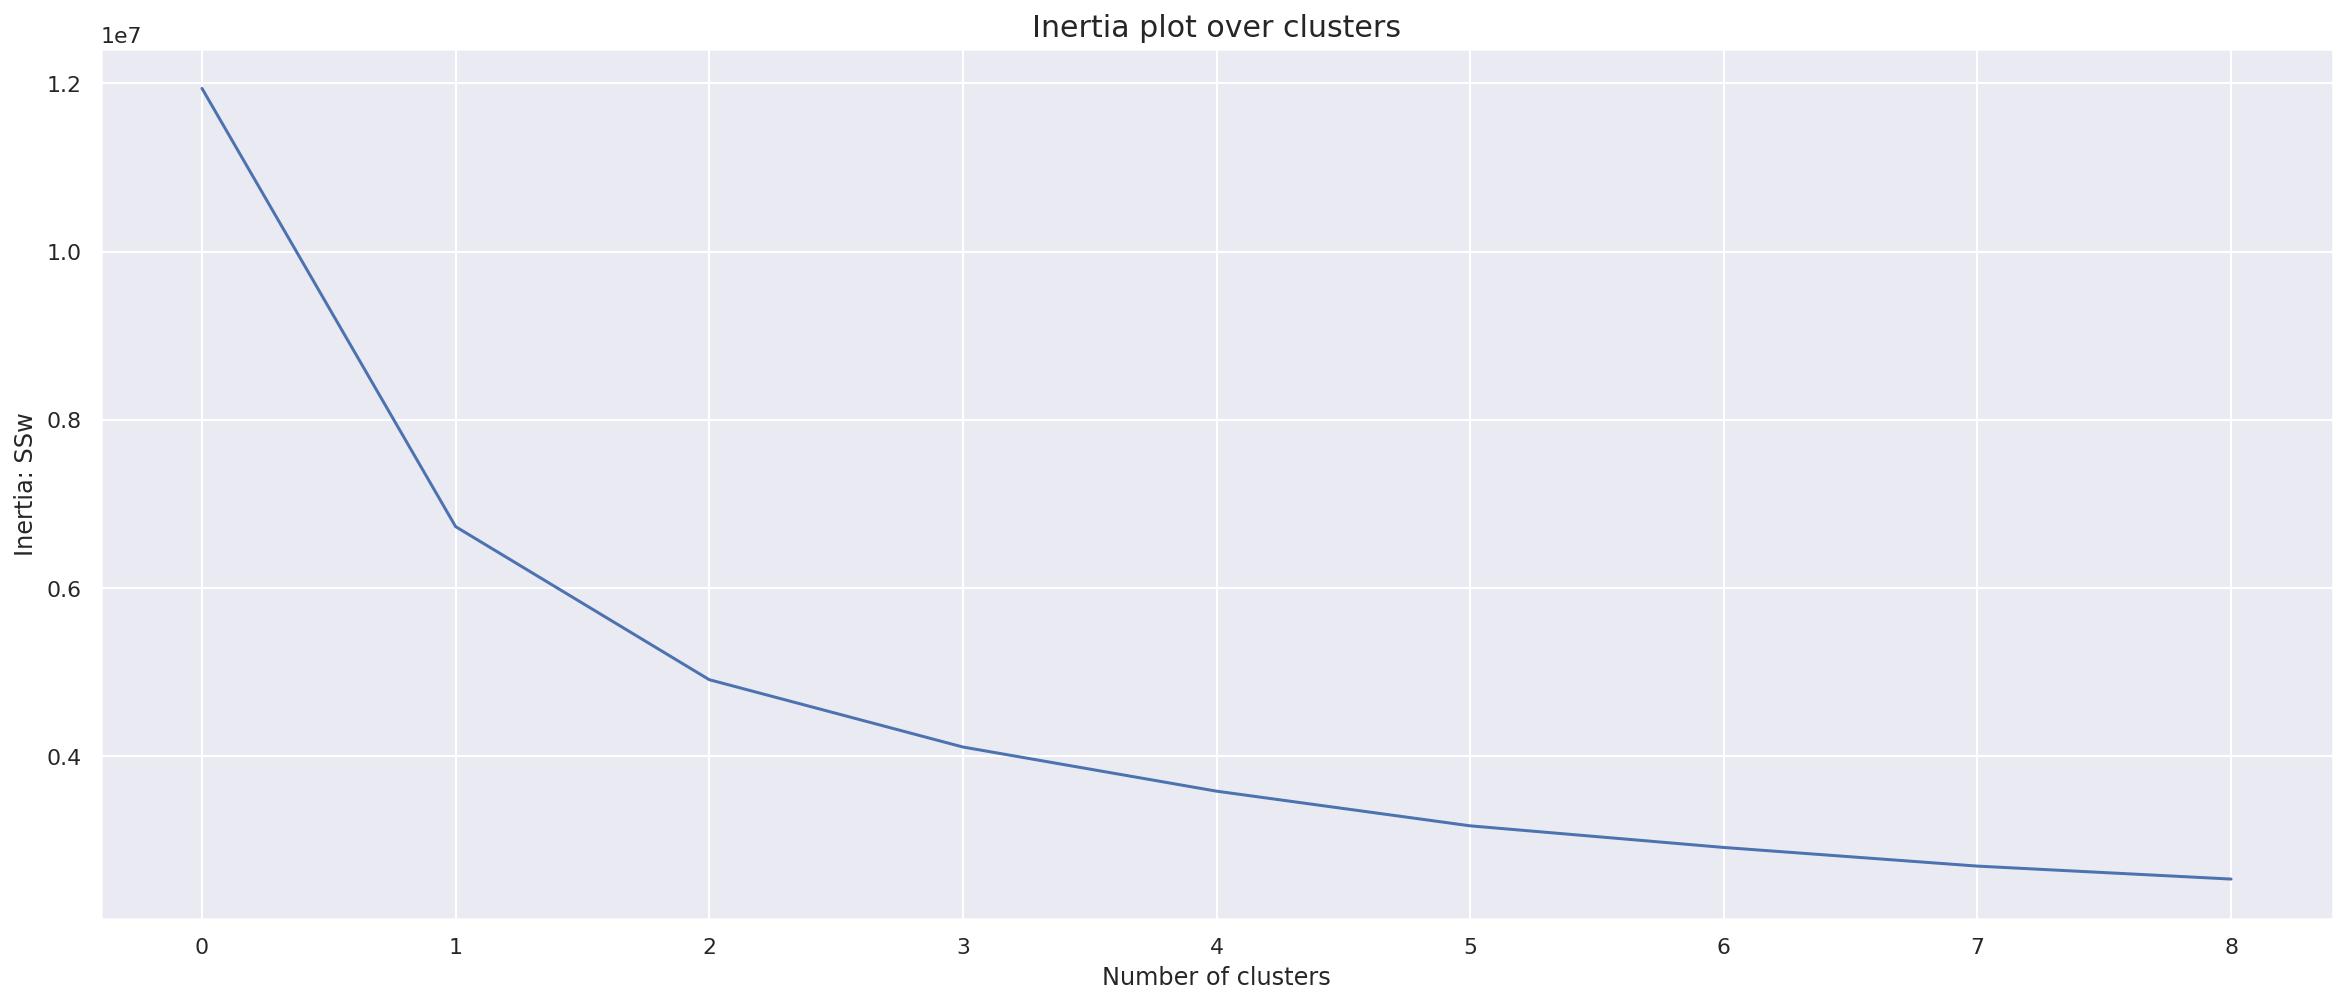

In [ ]:
# The inertia plot
plt.figure(figsize=(20,8))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [ ]:
number_clusters = 3

In [ ]:
kmeans_engagement = KMeans(n_clusters=number_clusters)
kmeans_engagement.fit(df[engagement_features])

kmeans_behavior = KMeans(n_clusters=number_clusters)
kmeans_behavior.fit(df[behavior_features])

df_eng["cluster-engagement"] = kmeans_engagement.labels_
centroids_engagement = kmeans_engagement.cluster_centers_

df_beh["cluster-behavior"] = kmeans_behavior.labels_
centroids_behavior = kmeans_behavior.cluster_centers_

In [ ]:
df_eng

,Income,Freq,Monetary,Recency,Dayswus,WebPurchase,WebVisit,LTV,cluster-engagement
0,36143,6,150,65,875,60,8,14,1
1,12808,3,25,93,656,62,6,-4,1
2,33397,3,30,99,555,41,4,-8,1
3,31351,2,34,11,736,73,8,0,1
4,17957,2,16,24,900,35,4,-7,1
...,...,...,...,...,...,...,...,...,...
9995,106340,38,1980,1,1218,16,4,639,0
9996,109324,44,2350,57,1044,14,5,1256,0
9997,122430,31,1543,9,554,15,1,513,0
9998,111567,32,1595,84,1127,15,2,919,0


In [ ]:
df_eng.describe()

,Income,Freq,Monetary,Recency,Dayswus,WebPurchase,WebVisit,LTV,cluster-engagement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,69904.358000,14.628100,622.555200,62.406800,898.102000,42.376200,5.216600,209.07120,1.038000
std,27612.233311,11.969073,647.135323,69.874255,202.492789,18.522062,2.330457,291.98604,0.819892
min,10000.000000,1.000000,6.000000,0.000000,550.000000,4.000000,0.000000,-178.00000,0.000000
25%,47642.000000,4.000000,63.000000,26.000000,723.750000,28.000000,3.000000,-2.00000,0.000000
50%,70012.000000,12.000000,383.000000,52.000000,894.000000,45.000000,6.000000,57.00000,1.000000
75%,92147.000000,24.000000,1077.000000,78.250000,1074.000000,57.000000,7.000000,364.00000,2.000000
max,140628.000000,56.000000,3052.000000,549.000000,1250.000000,88.000000,10.000000,1791.00000,2.000000


In [ ]:
df_beh

,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,cluster-behavior
0,6,28,27,17,22,10,0
1,6,26,15,19,33,15,0
2,10,16,11,18,45,55,0
3,7,11,13,32,37,48,0
4,8,31,19,30,12,47,0
...,...,...,...,...,...,...,...
9995,25,4,58,7,7,2,2
9996,70,3,23,2,3,3,1
9997,18,16,31,21,15,4,2
9998,49,3,42,1,4,0,2


In [ ]:
df_beh.describe()

,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,cluster-behavior
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.382700,7.054500,28.521300,7.069800,6.947400,16.546600,1.265800
std,23.453815,7.866544,12.583957,8.015083,7.879546,17.247672,0.709789
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,19.000000,2.000000,2.000000,4.000000,1.000000
50%,51.000000,4.000000,28.000000,4.000000,4.000000,10.000000,1.000000
75%,69.000000,10.000000,37.000000,10.000000,9.000000,23.000000,2.000000
max,99.000000,75.000000,74.000000,62.000000,77.000000,96.000000,2.000000


In [ ]:
kmeans_engagement.cluster_centers_

array([[1.02081699e+05, 2.84377358e+01, 1.37338585e+03, 5.01433962e+01,
        8.90987421e+02, 2.39009434e+01, 3.13081761e+00, 5.40123899e+02],
       [3.81336589e+04, 3.89662577e+00, 8.14496933e+01, 8.04782209e+01,
        9.02469018e+02, 5.66101227e+01, 6.77331288e+00, 2.80368098e-01],
       [7.02550702e+04, 1.21196629e+01, 4.47376124e+02, 5.68126404e+01,
        9.00458146e+02, 4.58449438e+01, 5.65421348e+00, 1.04551685e+02]])

In [ ]:
kmeans_behavior.cluster_centers_

array([[21.07064161, 16.11989631, 29.83538561, 16.52041478, 16.42968244,
        45.65392093],
       [72.93543085,  2.60835877, 19.22540502,  2.63113407,  2.55435548,
        11.5454332 ],
       [38.27608385,  8.23320629, 37.46927108,  8.09933302,  7.91900905,
        10.92186756]])

In [ ]:
#  Interpreting engagement 
kmeans_engagement_disclosure = df_eng.groupby('cluster-engagement').agg({
    'Income': ['mean','max','min'],
    'Freq': ['mean','max','min'],
    'Monetary': ['mean','max','min'],
    'Recency': ['mean','max','min'],
    'Dayswus': ['mean','max','min'],
    'WebPurchase': ['mean','max','min'],
    'WebVisit': ['mean','max','min'],
    'LTV': ['mean','max','min']
}).round(1)
print(kmeans_engagement_disclosure)

                      Income                 Freq         Monetary            \
                        mean     max    min  mean max min     mean   max min   
cluster-engagement                                                             
0                   102091.7  140628  86168  28.4  56   3   1373.4  3052  63   
1                    38153.3   54182  10000   3.9  21   1     81.5   902   6   
2                    70282.1   86145  54212  12.1  41   1    448.3  2166  10   

                   Recency  ... Dayswus WebPurchase         WebVisit          \
                      mean  ...     min        mean max min     mean max min   
cluster-engagement          ...                                                
0                     50.1  ...     550        23.9  74   4      3.1   9   0   
1                     80.5  ...     550        56.6  84  13      6.8  10   1   
2                     56.8  ...     550        45.8  88   6      5.7  10   0   

                      LTV             

In [ ]:
#  Interpreting behavior 
kmeans_behavior_disclosure = df_beh.groupby('cluster-behavior').agg({
    'Dryred': ['mean','max','min'],
    'Sweetred': ['mean','max','min'],
    'Drywh': ['mean','max','min'],
    'Sweetwh': ['mean','max','min'],
    'Dessert': ['mean','max','min'],
    'Exotic': ['mean','max','min']
}).round(1)
print(kmeans_behavior_disclosure)

                 Dryred         Sweetred         Drywh         Sweetwh      \
                   mean max min     mean max min  mean max min    mean max   
cluster-behavior                                                             
0                  21.1  70   1     16.1  75   0  29.8  73   4    16.5  62   
1                  72.9  99  50      2.6  23   0  19.2  38   1     2.6  27   
2                  38.3  58   4      8.2  55   0  37.5  74   7     8.1  54   

                     Dessert         Exotic          
                 min    mean max min   mean max min  
cluster-behavior                                     
0                  0    16.4  77   0   45.7  96   7  
1                  0     2.6  21   0   11.5  72   0  
2                  0     7.9  48   0   10.9  49   0  


In [ ]:
df_eng.to_excel(r'Path of excel\engagement-cluster.xlsx', sheet_name='engagement', index=False)

In [ ]:
df_beh.to_excel(r'Path of excel\behavior-cluster.xlsx', sheet_name='behavior', index=False)

#**3. Clustering by perspective**#


In [ ]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))

     # return sum of sum of squares of each df variable
    return ss 

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):

    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


In [ ]:
# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    affinity='euclidean'
)

In [ ]:
"""Find the optimal cluster on engagement Variables"""

# Obtaining the R² scores for each cluster solution on engagement variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_eng, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_eng, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

,kmeans,complete,average,single,ward
2,0.720014,0.712150,0.654406,0.001296,0.705199
3,0.863402,0.779436,0.857675,0.001296,0.848441
4,0.919089,0.888129,0.871877,0.006525,0.910640
5,0.946393,0.935486,0.910445,0.010222,0.931711
6,0.960924,0.937463,0.954628,0.010233,0.951670
7,0.970715,0.960416,0.955018,0.011132,0.969753
8,0.976962,0.966038,0.961336,0.012138,0.974166
9,0.981664,0.969800,0.970413,0.015043,0.977877


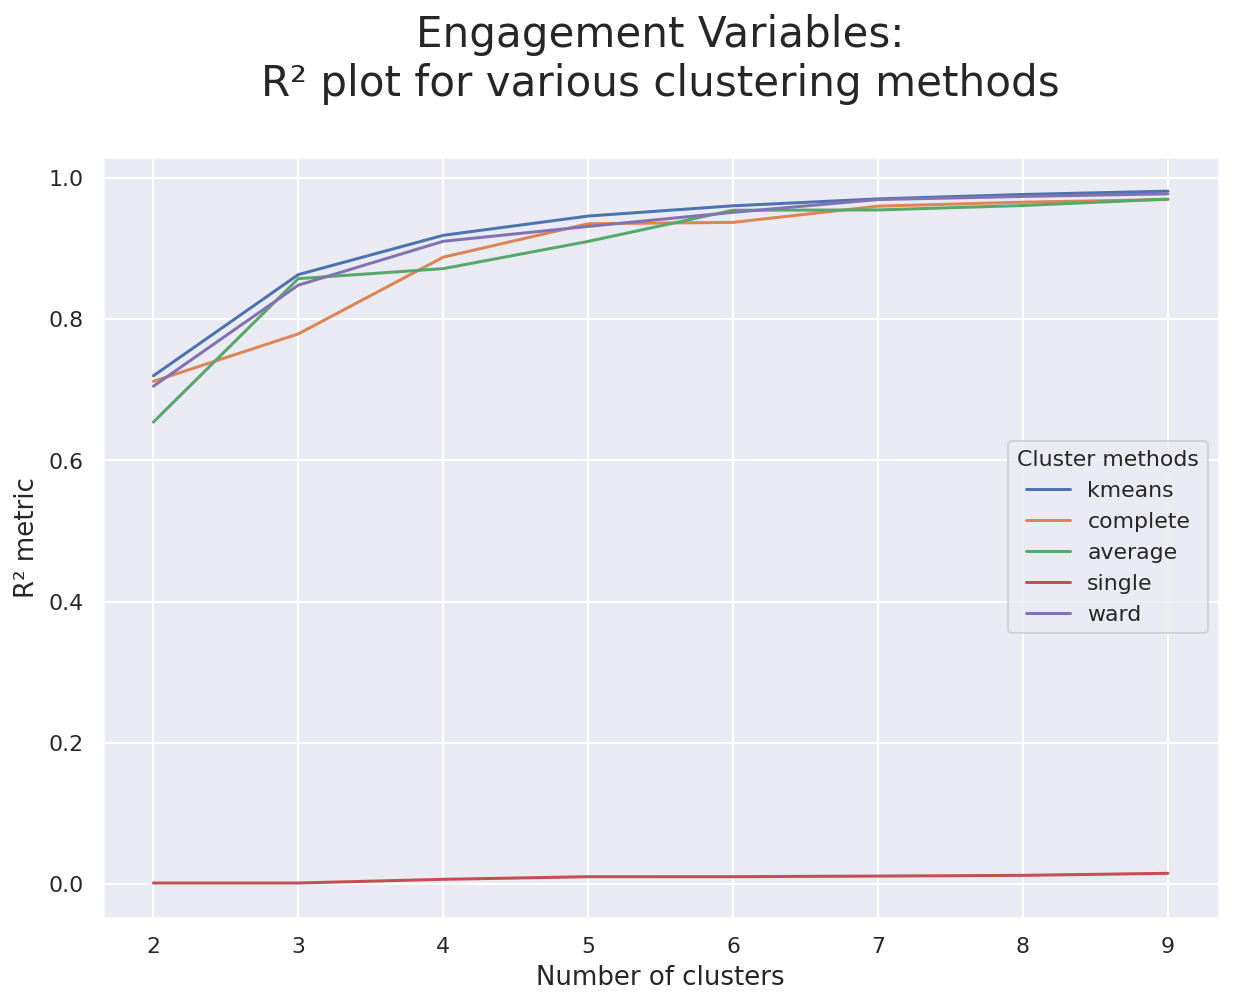

In [ ]:
"""Find the optimal cluster on engagement Variables"""

# Visualizing the R² scores for each cluster solution on engagement vior variables

pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Engagement Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [ ]:
# Obtaining the R² scores for each cluster solution on behavior variables

r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_beh, kmeans)
 
for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_beh, hierarchical.set_params(linkage=linkage)
    )
pd.DataFrame(r2_scores)

,kmeans,complete,average,single,ward
2,0.436106,0.385652,0.001252,0.000550,0.391851
3,0.588830,0.462065,0.213185,0.001119,0.534390
4,0.655664,0.467530,0.215409,0.002052,0.614144
5,0.699582,0.577332,0.216045,0.003782,0.654871
6,0.734046,0.581926,0.437823,0.004493,0.687722
7,0.755609,0.617568,0.444631,0.004893,0.712425
8,0.774183,0.631881,0.472604,0.005546,0.736257
9,0.787104,0.652237,0.473076,0.010712,0.749312


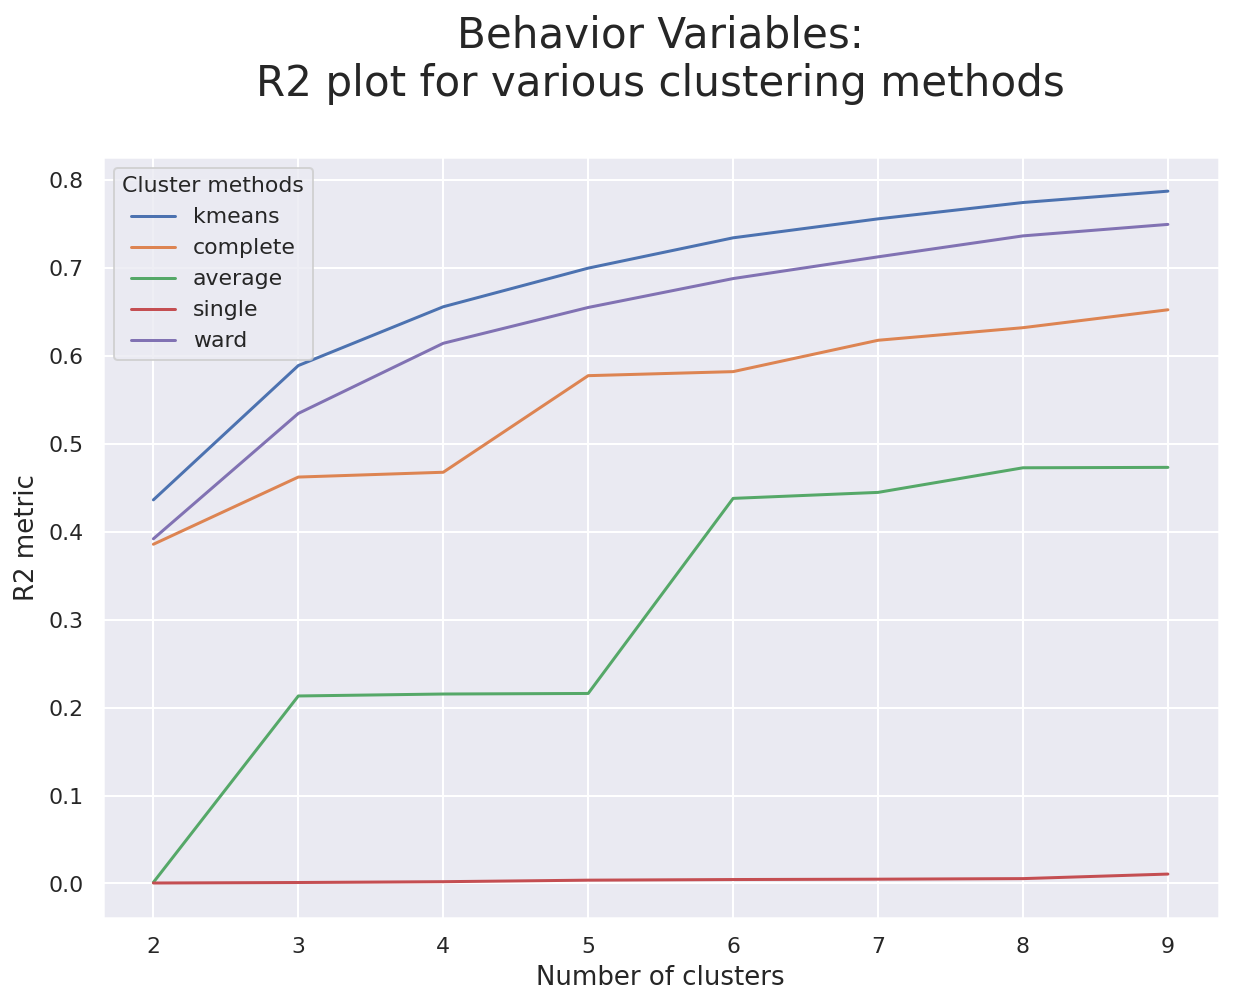

In [ ]:
# Visualizing the R² scores for each cluster solution on behavior variables

pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Behavior Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

In [ ]:
# Applying the right clustering (algorithm and number of clusters) for each perspective

kmeans_eng = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
engagement_labels = kmeans_eng.fit_predict(df_eng)

kmeans_beh = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=20,
    random_state=42
)
behavior_labels = kmeans_beh.fit_predict(df_beh)

df['engagement_labels'] = engagement_labels
df['behavior_labels'] = behavior_labels

In [ ]:
# Count label frequencies (contigency table)
df.groupby(['engagement_labels', 'behavior_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('engagement_labels', 'behavior_labels', 0)

behavior_labels,0,1,2,3
engagement_labels,,,,
0,495,1710,165,1192
1,990,406,1020,889
2,1198,608,69,1258


In [ ]:
"""Manual merging: Merge lowest frequency clusters into closest clusters"""

def manual_merge(to_merge, df, engagement_labels, behavior_labels):

  """
  Merges using list of clusters given
  """
  df_centroids = df.groupby([engagement_labels, behavior_labels])\
      [metric_features].mean()

  # Computing the euclidean distance matrix between the centroids
  euclidean = pairwise_distances(df_centroids)
  df_dists = pd.DataFrame(
      euclidean, columns=df_centroids.index, index=df_centroids.index
  )

  source_target = {}
  for clus in to_merge:
      if clus not in source_target.values():
          source_target[clus] = df_dists.loc[clus].sort_values().index[1]
  
  df_ = df.copy()

  # Changing the behavior_labels and product_labels based on source_target

  for source, target in source_target.items():
      mask = (df_[engagement_labels]==source[0]) & (df_[behavior_labels]==source[1])
      df_.loc[mask, engagement_labels] = target[0]
      df_.loc[mask, behavior_labels] = target[1]

  return df_


In [ ]:
# Clusters with low frequency to be merged:
to_merge = [(0,3), (2,3),(1,0),(0,2) ]

### Explanation of manual_merge() 

df_centroids = df.groupby(['behavior_labels', 'engagement_labels'])\
    [metric_features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)
df_dists


behavior_labels                               0                              \
engagement_labels                             0             1             2   
behavior_labels engagement_labels                                             
0               0                      0.000000  33214.938167  33733.973452   
                1                  33214.938167      0.000000  66944.839066   
                2                  33733.973452  66944.839066      0.000000   
1               0                    290.511800  33411.008709  33537.872613   
                1                  25422.936900   7794.999528  59154.516944   
                2                  27872.556441  61084.663168   5862.514326   
2               0                   4453.986974  28762.469501  38186.791535   
                1                  38109.393401   4895.035706  71838.326133   
                2                  31072.940045  64286.119617   2692.490501   
3               0                    377.549917  33556.707932  33391.769407   
                1                  27811.659053   5408.884434  61540.990455   
                2                  31568.764302  64780.147827   2173.732339   

behavior_labels                               1                              \
engagement_labels                             0             1             2   
behavior_labels engagement_labels                                             
0               0                    290.511800  25422.936900  27872.556441   
                1                  33411.008709   7794.999528  61084.663168   
                2                  33537.872613  59154.516944   5862.514326   
1               0                      0.000000  25620.403245  27676.709584   
                1                  25620.403245      0.000691  53293.782688   
                2                  27676.709584  53293.782688      0.000000   
2               0                   4651.173108  20970.939266  32325.507603   
                1                  38305.100921  12689.705756  65978.407025   
                2                  30879.104512  56494.204440   3215.682189   
3               0                    157.091015  25765.776135  27530.561371   
                1                  28006.179653   2419.651956  55680.826201   
                2                  31373.835091  56989.155470   3699.633109   

behavior_labels                               2                              \
engagement_labels                             0             1             2   
behavior_labels engagement_labels                                             
0               0                   4453.986974  38109.393401  31072.940045   
                1                  28762.469501   4895.035706  64286.119617   
                2                  38186.791535  71838.326133   2692.490501   
1               0                   4651.173108  38305.100921  30879.104512   
                1                  20970.939266  12689.705756  56494.204440   
                2                  32325.507603  65978.407025   3215.682189   
2               0                      0.000000  33656.868757  35526.460677   
                1                  33656.868757      0.000000  69180.176511   
                2                  35526.460677  69180.176511      0.001953   
3               0                   4795.816469  38450.891657  30732.494523   
                1                  23358.647254  10300.425042  58883.215272   
                2                  36022.010080  69673.839092    562.453173   

behavior_labels                               3                              
engagement_labels                             0             1             2  
behavior_labels engagement_labels                                            
0               0                    377.549917  27811.659053  31568.764302  
                1                  33556.707932   5408.884434  64780.147827  
                2                  33391.769407  615

In [ ]:
# Count NEW label frequencies (using explanatory cells)
df_.groupby(['engagement_labels', 'behavior_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('engagement_labels', 'behavior_labels', 0)


behavior_labels,0,1,2,3
engagement_labels,,,,
0,495,1710,165,1192
1,990,406,1020,889
2,1198,608,69,1258


In [ ]:
# Reminder of original label frequencies
df.groupby(['engagement_labels', 'behavior_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('behavior_labels', 'engagement_labels', 0)

engagement_labels,0,1,2
behavior_labels,,,
0,495,990,1198
1,1710,406,608
2,165,1020,69
3,1192,889,1258


In [ ]:
"""Merging using Hierarquical Clustering"""

# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['behavior_labels', 'engagement_labels'])\
    [metric_features].mean()
df_centroids

Custid     Dayswus        Age  \
behavior_labels engagement_labels                                       
0               0                  6128.537374  885.941414  48.591919   
                1                  6067.252525  895.954545  27.226263   
                2                  5912.934057  885.111018  69.730384   
1               0                  5924.045614  901.660819  48.695322   
                1                  6249.896552  890.556650  37.751232   
                2                  5990.348684  891.876645  62.860197   
2               0                  6057.993939  901.066667  42.921212   
                1                  6004.179412  903.365686  23.885294   
                2                  6274.246377  860.768116  65.594203   
3               0                  5972.205537  903.157718  49.051174   
                1                  5860.570304  914.736783  32.673791   
                2                  6109.475358  898.399841  67.112083   

                                        Educ         Income   Kidhome  \
behavior_labels engagement_labels                                       
0               0                  16.088889   70666.147475  0.430303   
                1                  16.095960   37453.706061  0.806061   
                2                  16.251252  104381.727880  0.023372   
1               0                  17.508772   70861.966667  0.320468   
                1                  17.995074   45246.246305  0.679803   
                2                  17.893092   98525.764803  0.182566   
2               0                  15.418182   66214.848485  0.539394   
                1                  14.799020   32559.255882  0.738235   
                2                  14.956522  101727.884058  0.057971   
3               0                  16.863255   71007.765940  0.416107   
                1                  17.273341   42858.473566  0.838020   
                2                  17.305246  102217.964229  0.100954   

                                   Teenhome       Freq    Recency  \
behavior_labels engagement_labels                                   
0               0                  0.498990  12.200000  59.145455   
                1                  0.191919   3.789899  82.674747   
                2                  0.114357  29.616027  49.362270   
1               0                  0.873099  12.477778  56.181871   
                1                  0.699507   4.618227  71.298030   
                2                  0.628289  26.146382  48.939145   
2               0                  0.593939   9.890909  61.824242   
                1                  0.149020   3.520588  82.057843   
                2                  0.318841  25.681159  47.217391   
3               0                  0.723993  12.472315  55.820470   
                1                  0.454443   4.229471  79.061867   
                2                  0.338633  28.838633  51.710652   

                                      Monetary  ...    Perdeal     Dryred  \
behavior_labels engagement_labels               ...                         
0               0                   456.517172  ...  27.783838  31.963636   
                1                    77.662626  ...  55.966667  25.818182   
                2                  1447.032554  ...   3.199499  30.016694   
1               0                   461.165497  ...  32.667836  80.763743   
                1                   112.059113  ...  60.596059  77.556650   
                2                  1229.391447  ...  10.263158  76.707237   
2               0                   340.078788  ...  36.030303  37.212121   
                1                    63.655882  ...  57.177451  18.664706   
                2                  1202.521739  ...   5.811594  28.507246   
3               0                   468.044463  ...  32.336409  56.236577   
                1                    96.494938  ...  60.133858  54.328459   
                2         

In [ ]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

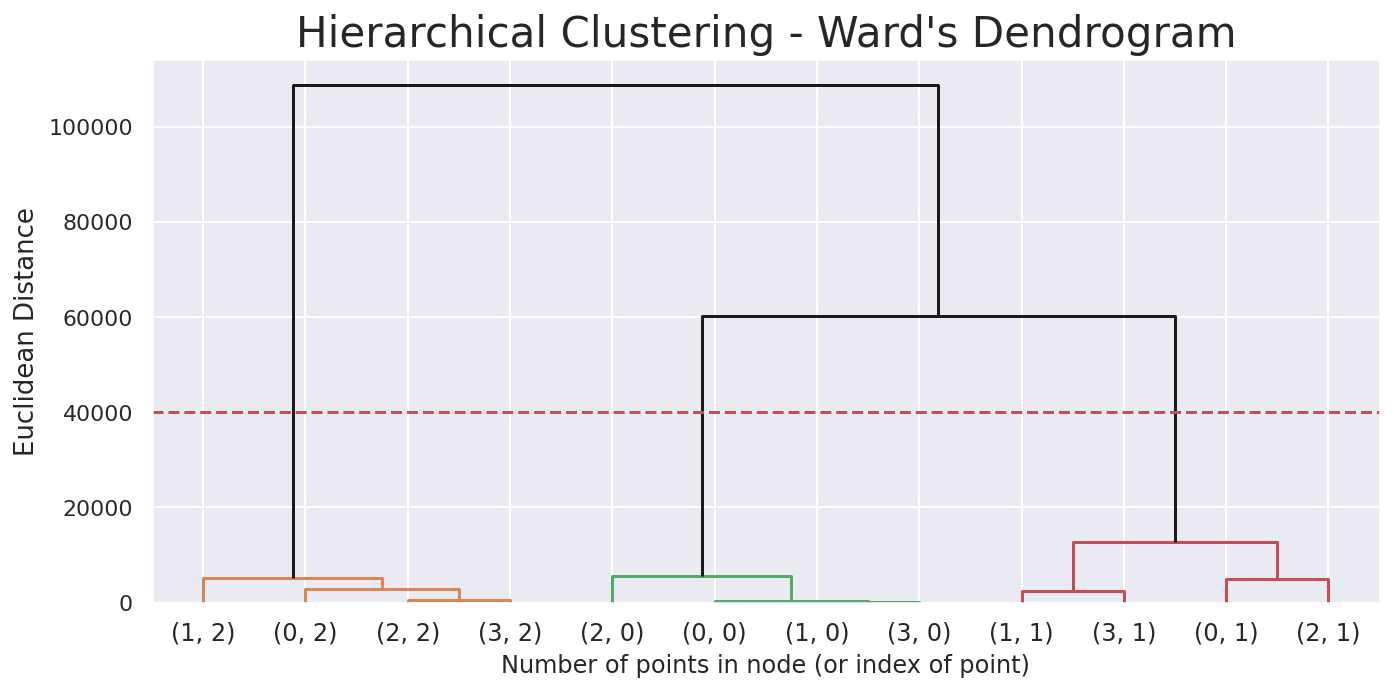

In [ ]:
"""PLOT DENDOGRAM"""

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 40000
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Custid     Dayswus        Age  \
behavior_labels engagement_labels                                       
0               0                  6128.537374  885.941414  48.591919   
                1                  6067.252525  895.954545  27.226263   
                2                  5912.934057  885.111018  69.730384   
1               0                  5924.045614  901.660819  48.695322   
                1                  6249.896552  890.556650  37.751232   
                2                  5990.348684  891.876645  62.860197   
2               0                  6057.993939  901.066667  42.921212   
                1                  6004.179412  903.365686  23.885294   
                2                  6274.246377  860.768116  65.594203   
3               0                  5972.205537  903.157718  49.051174   
                1                  5860.570304  914.736783  32.673791   
                2                  6109.475358  898.399841  67.112083   

                                        Educ         Income   Kidhome  \
behavior_labels engagement_labels                                       
0               0                  16.088889   70666.147475  0.430303   
                1                  16.095960   37453.706061  0.806061   
                2                  16.251252  104381.727880  0.023372   
1               0                  17.508772   70861.966667  0.320468   
                1                  17.995074   45246.246305  0.679803   
                2                  17.893092   98525.764803  0.182566   
2               0                  15.418182   66214.848485  0.539394   
                1                  14.799020   32559.255882  0.738235   
                2                  14.956522  101727.884058  0.057971   
3               0                  16.863255   71007.765940  0.416107   
                1                  17.273341   42858.473566  0.838020   
                2                  17.305246  102217.964229  0.100954   

                                   Teenhome       Freq    Recency  \
behavior_labels engagement_labels                                   
0               0                  0.498990  12.200000  59.145455   
                1                  0.191919   3.789899  82.674747   
                2                  0.114357  29.616027  49.362270   
1               0                  0.873099  12.477778  56.181871   
                1                  0.699507   4.618227  71.298030   
                2                  0.628289  26.146382  48.939145   
2               0                  0.593939   9.890909  61.824242   
                1                  0.149020   3.520588  82.057843   
                2                  0.318841  25.681159  47.217391   
3               0                  0.723993  12.472315  55.820470   
                1                  0.454443   4.229471  79.061867   
                2                  0.338633  28.838633  51.710652   

                                      Monetary  ...     Dryred   Sweetred  \
behavior_labels engagement_labels               ...                         
0               0                   456.517172  ...  31.963636  10.288889   
                1                    77.662626  ...  25.818182  11.766667   
                2                  1447.032554  ...  30.016694   9.772120   
1               0                   461.165497  ...  80.763743   1.606433   
                1                   112.059113  ...  77.556650   1.679803   
                2                  1229.391447  ...  76.707237   2.274671   
2               0                   340.078788  ...  37.212121  10.248485   
                1                    63.655882  ...  18.664706  17.098039   
                2                  1202.521739  ...  28.507246  15.797101   
3               0                   468.044463  ...  56.236577   5.000000   
                1                    96.494938  ...  54.328459   4.948256   
                2         

In [ ]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

In [ ]:
## cluster_mapper is of the form:
## (label1, label2) : merged_label,
## 
## For our case:
## ('behavior_label', 'product_label') : merged_label,
## ...
## 
cluster_mapper

{(0, 0): 2,
 (0, 1): 0,
 (0, 2): 1,
 (1, 0): 2,
 (1, 1): 0,
 (1, 2): 1,
 (2, 0): 2,
 (2, 1): 0,
 (2, 2): 1,
 (3, 0): 2,
 (3, 1): 0,
 (3, 2): 1}

In [ ]:
def hclust_mapper(df, engagement_labels, behavior_labels, merged_label):
  df_ = df.copy()

  # Mapping the hierarchical clusters on the centroids to the observations
  df_[merged_label] = df_.apply(
      lambda row: cluster_mapper[
          (row[engagement_labels], row[behavior_labels])
      ], axis=1
  )

  # Merged cluster centroids
  df_.groupby(merged_label).mean()

  return df_ 

In [ ]:
df_h = hclust_mapper(df, 'behavior_labels', 'engagement_labels', 'merged_labels')

In [ ]:
def merged_contingency(df, cluster_mapper, engagement_labels, behavior_labels, merged_label):

  #Merge cluster contigency table
  # Getting size of each final cluster
  df_counts = df.groupby(merged_label)\
      .size()\
      .to_frame()

  # Getting the product and behavior labels
  df_counts = df_counts\
      .rename({v:k for k, v in cluster_mapper.items()})\
      .reset_index()

  df_counts[engagement_labels] = df_counts[merged_label].apply(lambda x: x[0])
  df_counts[behavior_labels] = df_counts[merged_label].apply(lambda x: x[1])
  return df_counts.pivot(engagement_labels, behavior_labels, 0)


In [ ]:
merged_contingency(df, cluster_mapper, 'engagement_labels', 'behavior_labels', 'merged_labels')

KeyError: ignored

In [ ]:
# Reminder of original label frequencies
df.groupby(['engagement_labels', 'behavior_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('behavior_labels', 'engagement_labels', 0)

engagement_labels,0,1,2
behavior_labels,,,
0,495,990,1198
1,1710,406,608
2,165,1020,69
3,1192,889,1258


In [ ]:
two_dim = TSNE(random_state=42).fit_transform(df[metric_features])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeyError: ignored

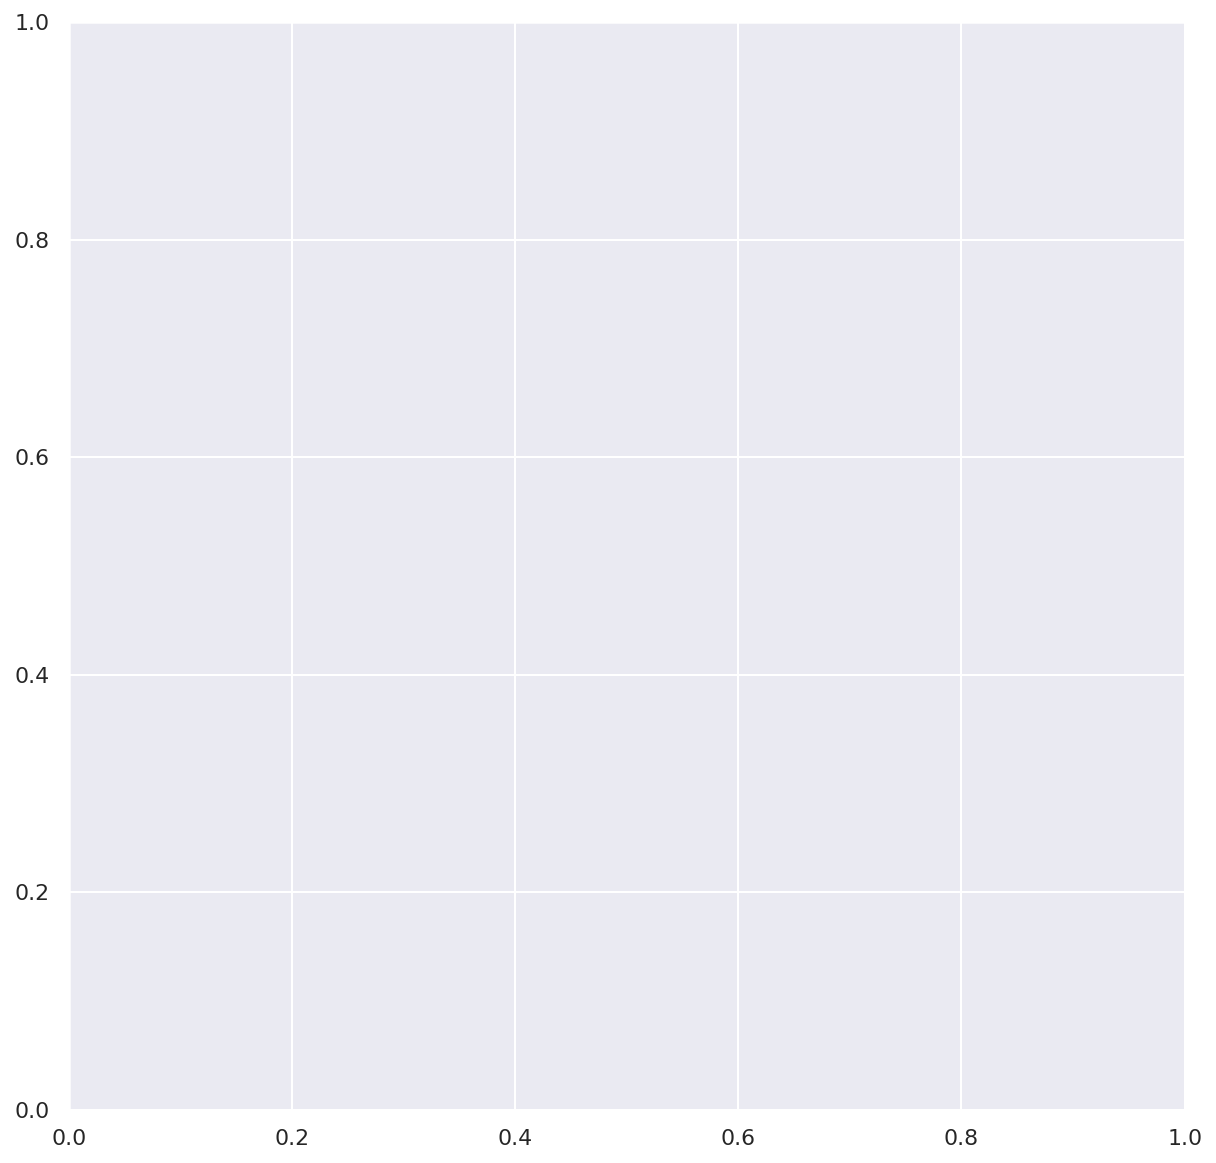

In [ ]:
two_dim_df = pd.DataFrame(two_dim, index=df.index)

fig, ax= plt.subplots(figsize=(10,10))
scatter = ax.scatter(x = two_dim_df[0], 
                     y=two_dim_df[1], 
                     c=df['merged_labels'], 
                     s=5,
                     cmap='tab10'
                     )
ax.set_xlabel("engagement")
ax.set_ylabel("behavior")
ax.set_xticks([])
ax.set_yticks([])

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Cluster Labels")
ax.add_artist(legend1)

plt.title("t-SNE Visualization of Clustering Solution")
plt.show()